## Vader Sentiment scoring with Under GDPR model 

In [49]:
import pandas as pd
matched_df = pd.read_csv("under_gdpr_propensity_sentiment.csv")

In [5]:
#doesn't need to be reran I supplemented the above with the sentiment included for the lags and leads model below
#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#import pandas as pd

# Initialize VADER
#analyzer = SentimentIntensityAnalyzer()

# Define a function to get compound sentiment score
#def get_vader_score(text):
    if isinstance(text, str):
        return analyzer.polarity_scores(text)['compound']
    else:
        return None  # In case there are NaNs or non-strings

# Apply to 'full_review' column
#matched_df['vader_sentiment'] = matched_df['full_review'].apply(get_vader_score)


In [7]:
matched_df.sample(10)

,rating,status,date,job,company_name,CEO_Approval_Sentiment,Business_Outlook_Sentiment,Recommmend_sentiment,eu_status,founded_year,...,industry,month,full_review,treated,company_size_Mid-Size,company_size_Small,seniority_level_Mid-Level,seniority_level_Senior,propensity_score,vader_sentiment
1610623,3.0,"Former Employee, less than 1 year",2017-02-11,Courtesy Clerk,Vons,0.5,0.5,-1.0,Non-EU,1906,...,Food & Beverage,2017-02,Union dues make it not worth your time The oth...,0,False,False,False,False,0.613563,0.0920
545907,3.0,"Current Employee, more than 5 years",2019-05-30,Digital Marketing Manager,IBM,0.5,1.0,-1.0,Non-EU,1911,...,IT & Software,2019-05,Culture Location I’m all cities \r\nColleagues...,1,False,False,False,True,0.613850,0.8779
256800,4.0,Current Employee,2019-07-12,Anonymous Employee,Tata Consultancy Services,1.0,1.0,1.0,Non-EU,1968,...,IT & Software,2019-07,"Developer Good for girls, and policies Nothing...",1,False,False,False,True,0.617122,0.1805
567100,5.0,"Current Employee, more than 3 years",2019-05-15,Integration Engineer,Ericsson Worldwide,0.0,0.0,0.0,EU,1876,...,Telecommunications,2019-05,IP Great company and nice environment there is...,1,False,False,True,False,0.611836,0.7845
367382,3.0,"Current Employee, more than 1 year",2017-05-27,Anonymous Employee,McDonald s,0.5,0.5,-1.0,Non-EU,1940,...,Food & Beverage,2017-05,Crew member I get paid every week The custumer...,1,False,False,False,False,0.615516,-0.4588
164902,5.0,Current Employee,2016-10-16,Anonymous Employee,Procter & Gamble,0.0,0.0,0.0,Non-EU,1837,...,Other,2016-10,Job's search The best company to kick start yo...,1,False,False,False,True,0.609587,0.6696
1911362,1.0,"Former Employee, more than 3 years",2016-10-25,Anonymous Employee,Progressive Insurance,0.0,-1.0,-1.0,Non-EU,1937,...,Financial Services,2016-10,"Doesn't balance time and work, unrealistic exp...",0,False,False,True,False,0.615344,-0.2960
2017908,5.0,Current Employee,2017-07-15,,Life Care Centers of America,0.5,1.0,1.0,Non-EU,1970,...,Healthcare,2017-07,"Lafayette, In Location - Great rehab team to w...",0,False,False,False,True,0.617237,0.9475
41891,3.0,Current Employee,2018-08-06,Anonymous Employee,PwC,0.0,0.0,0.0,Non-EU,1849,...,Consulting & Business Services,2018-08,Great start to a career Learn to work with a t...,1,False,False,False,True,0.610280,0.8122
2489256,2.0,"Current Employee, less than 1 year",2017-05-05,Anonymous Employee,University of Pittsburgh,-1.0,-1.0,-1.0,Non-EU,1787,...,Education,2017-05,Bureaucracy at its finest Large institution wi...,0,False,False,False,False,0.606697,0.9279


In [8]:
#matched_df.to_csv('under_gdpr_propensity_sentiment.csv', index=False)


In [ ]:
matched_df.describe()
matched_df.describe(include='object')
print(matched_df['under_gdpr'].value_counts())
print(matched_df['eu_status'].value_counts())

print(matched_df['company_size_Mid-Size'].value_counts())
print(matched_df['seniority_level_Mid-Level'].value_counts())
print(matched_df['seniority_level_Senior'].value_counts())


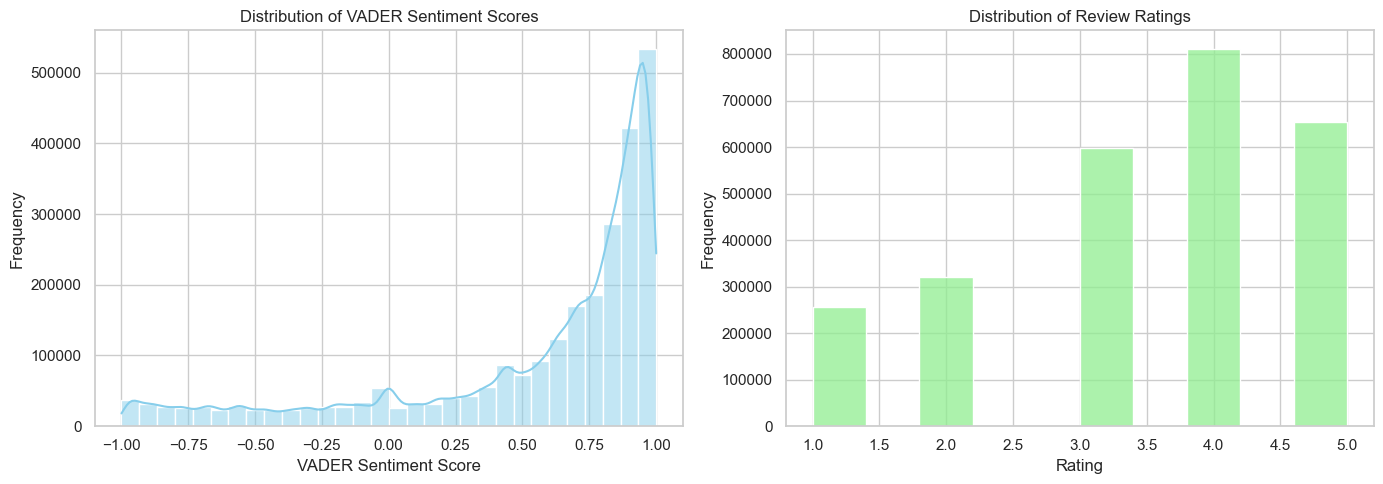

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot VADER Sentiment Distribution
sns.histplot(matched_df['vader_sentiment'], bins=30, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title("Distribution of VADER Sentiment Scores")
axes[0].set_xlabel("VADER Sentiment Score")
axes[0].set_ylabel("Frequency")

# Plot Rating Distribution
sns.histplot(matched_df['rating'], bins=10, kde=False, ax=axes[1], color='lightgreen')
axes[1].set_title("Distribution of Review Ratings")
axes[1].set_xlabel("Rating")
axes[1].set_ylabel("Frequency")

# Adjust layout
plt.tight_layout()
plt.show()


In [12]:
print(matched_df.columns)

Index(['rating', 'status', 'date', 'job', 'company_name',
       'CEO_Approval_Sentiment', 'Business_Outlook_Sentiment',
       'Recommmend_sentiment', 'eu_status', 'founded_year', 'under_gdpr',
       'industry', 'month', 'full_review', 'treated', 'company_size_Mid-Size',
       'company_size_Small', 'seniority_level_Mid-Level',
       'seniority_level_Senior', 'propensity_score', 'vader_sentiment',
       'year'],
      dtype='object')


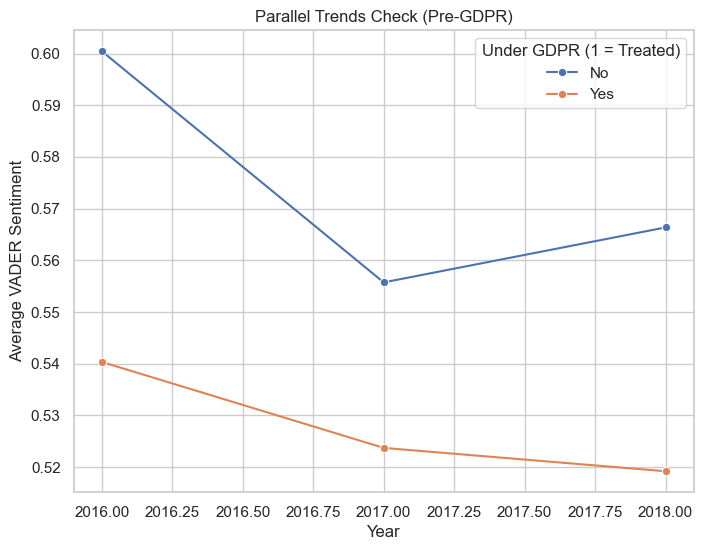

In [17]:

# Visual Test of Parallel Trends (Pre-GDPR Only)
matched_df['year'] = pd.to_datetime(matched_df['date']).dt.year
# Ensure the 'date' column is in datetime format
matched_df['date'] = pd.to_datetime(matched_df['date'], errors='coerce')

# Create the binary 'post_gdpr' column
matched_df['post_gdpr'] = (matched_df['date'] >= pd.Timestamp('2018-05-25')).astype(int)
# Filter to pre-GDPR years
pre_gdpr_df = matched_df[matched_df['post_gdpr'] == 0]

# Group by year and GDPR status
pre_trends = pre_gdpr_df.groupby(['year', 'under_gdpr'])['vader_sentiment'].mean().reset_index()

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.lineplot(data=pre_trends, x='year', y='vader_sentiment', hue='under_gdpr', marker='o')
plt.title("Parallel Trends Check (Pre-GDPR)")
plt.xlabel("Year")
plt.ylabel("Average VADER Sentiment")
plt.legend(title="Under GDPR (1 = Treated)")
plt.show()


## -------------------- Lags and leads model -----------------------

In [39]:
print(matched_df['under_gdpr'].head(10))
print(matched_df['under_gdpr'].dtype)
print(matched_df['under_gdpr'].value_counts(dropna=False))


0    Yes
1    Yes
2    Yes
3    Yes
4    Yes
5    Yes
6    Yes
7    Yes
8    Yes
9    Yes
Name: under_gdpr, dtype: object
object
under_gdpr
Yes    1319835
No     1319835
Name: count, dtype: int64


In [40]:
print(matched_df['vader_sentiment'].head())
print(matched_df['vader_sentiment'].dtype)


0   -0.8731
1   -0.9099
2    0.2442
3    0.9186
4    0.3132
Name: vader_sentiment, dtype: float64
float64


In [56]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Clean GDPR Indicator ---
matched_df['under_gdpr'] = matched_df['under_gdpr'].astype(str).str.strip().str.lower()
matched_df['under_gdpr'] = matched_df['under_gdpr'].map({'yes': 1, 'no': 0})

# --- 2. Parse Date and Create Year Columns ---
matched_df['date'] = pd.to_datetime(matched_df['date'], errors='coerce')
matched_df['year'] = matched_df['date'].dt.year
matched_df['gdpr_year'] = matched_df['year'] - 2018  # 0 = GDPR year

# --- 3. Keep Only Relevant Data in a New DataFrame ---
model_df = matched_df.dropna(subset=['under_gdpr', 'vader_sentiment', 'year']).copy()

# --- 4. Create Lag/Lead Year Dummies and Interaction Terms ---
rel_years = [-2, -1, 0, 1, 2]  # Adjust this range if needed
for yr in rel_years:
    col = f'year_m{abs(yr)}' if yr < 0 else f'year_{yr}'
    model_df[col] = (model_df['gdpr_year'] == yr).astype(int)
    model_df[f'{col}_treated'] = model_df[col] * model_df['under_gdpr']

# --- 5. Build Regression Formula ---
event_terms = [f"year_m{abs(yr)}_treated" if yr < 0 else f"year_{yr}_treated" for yr in rel_years if yr != -1]
formula = 'vader_sentiment ~ ' + ' + '.join(event_terms) + ' + under_gdpr'

# --- 6. Fit the Model ---
event_model = smf.rlm(formula=formula, data=model_df).fit()
print(event_model.summary())

# --- 7. Plot Coefficients ---
coefs = event_model.params[event_terms]
conf_int = event_model.conf_int().loc[event_terms]
years = [int(term.split('_')[1].replace('m', '-')) for term in event_terms]

event_plot_df = pd.DataFrame({
    'year': years,
    'coef': coefs.values,
    'ci_low': conf_int[0].values,
    'ci_high': conf_int[1].values
}).sort_values('year')

plt.figure(figsize=(10, 6))
sns.pointplot(data=event_plot_df, x='year', y='coef', color='blue')
plt.fill_between(event_plot_df['year'], event_plot_df['ci_low'], event_plot_df['ci_high'], alpha=0.3)
plt.axvline(0, color='red', linestyle='--', label='GDPR Enacted')
plt.axhline(0, color='black', linewidth=0.7)
plt.title('Event Study: Impact of GDPR on VADER Sentiment')
plt.xlabel('Year (Relative to 2018)')
plt.ylabel('Treatment Effect (vs. 2017)')
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\Ethan D\anaconda3\envs\bertmeister\Lib\site-packages\numpy\linalg\linalg.py:2027: RuntimeWarning: overflow encountered in divide
  s = divide(1, s, where=large, out=s)


MemoryError: Unable to allocate 121. MiB for an array with shape (6, 2639670) and data type float64

In [43]:
print(matched_df.columns)

Index(['rating', 'status', 'date', 'job', 'company_name',
       'CEO_Approval_Sentiment', 'Business_Outlook_Sentiment',
       'Recommmend_sentiment', 'eu_status', 'founded_year', 'under_gdpr',
       'industry', 'month', 'full_review', 'treated', 'company_size_Mid-Size',
       'company_size_Small', 'seniority_level_Mid-Level',
       'seniority_level_Senior', 'propensity_score', 'vader_sentiment', 'year',
       'gdpr_year'],
      dtype='object')


In [51]:
# Rename problematic columns by replacing hyphens with underscores
matched_df.rename(columns=lambda col: col.replace('-', '_'), inplace=True)


In [53]:
matched_df.sample(10)

,rating,status,date,job,company_name,CEO_Approval_Sentiment,Business_Outlook_Sentiment,Recommmend_sentiment,eu_status,founded_year,under_gdpr,industry,month,full_review,treated,company_size_Mid_Size,company_size_Small,seniority_level_Mid_Level,seniority_level_Senior,propensity_score,vader_sentiment,year,gdpr_year
1131111,5.0,"Current Employee, more than 1 year",2019-08-20,Student Ambassador,University of Nottingham,0.0,0.0,1.0,EU,1881,Yes,Education,2019-08,Hard work but fun! Fun\r\nEnergetic Place to w...,1,False,False,False,False,0.612124,0.9555,2019,1
2161250,4.0,Former Employee,2016-10-21,,Cineplex Entertainment,1.0,1.0,1.0,Non-EU,1912,No,Entertainment,2016-10,Good You got unlimited free movies for you and...,0,False,False,False,True,0.613908,0.9565,2016,-2
621645,4.0,"Current Employee, more than 3 years",2016-10-07,Program Manager,Dell Technologies,0.5,1.0,1.0,Non-EU,1984,Yes,IT & Software,2016-10,"Great people, high pressure environment Most e...",1,False,False,True,False,0.618039,0.8942,2016,-2
404777,2.0,"Former Employee, more than 5 years",2019-11-07,Pharmacy Technician,CVS Health,0.5,-1.0,-1.0,Non-EU,1963,Yes,Healthcare,2019-11,Pharmacy Tech Nice people and good customers m...,1,False,False,False,True,0.616836,0.4019,2019,1
1103050,5.0,"Current Employee, more than 3 years",2018-07-11,Senior Consultant,Deloitte,1.0,1.0,1.0,Non-EU,1845,Yes,Consulting & Business Services,2018-07,Amazing Opportunities Networking is amazing at...,1,False,False,True,False,0.610049,0.9313,2018,0
1657122,5.0,"Current Employee, more than 1 year",2018-03-15,Resource Teacher,The Goddard School,0.5,0.5,1.0,Non-EU,1988,No,Education,2018-03,I LOVE Working For Goddard! The Goddard School...,0,False,False,False,False,0.618268,0.9922,2018,0
525691,5.0,"Former Employee, more than 1 year",2020-04-21,Software Test Engineer,Salesforce,0.0,0.0,0.0,Non-EU,1999,Yes,IT & Software,2020-04,Great company! Great place to work. Amazing c...,1,False,False,False,False,0.618897,0.9422,2020,2
2574224,5.0,"Current Employee, more than 10 years",2018-03-11,Anonymous Employee,"Harley Davidson, Inc.",1.0,0.5,1.0,Non-EU,1903,No,Other,2018-03,Materials Supervisor manufacturing Good place ...,0,False,False,False,True,0.613390,0.6705,2018,0
1358623,3.0,"Former Employee, more than 5 years",2019-11-05,Director of Post,CALVIN KLEIN,1.0,1.0,1.0,Non-EU,1968,No,Retail,2019-11,"Great place to grow, hard place to advance Ama...",0,False,False,False,True,0.617122,0.9694,2019,1
2155387,5.0,Current Employee,2017-12-05,Anonymous Employee,Emory University,1.0,1.0,1.0,Non-EU,1836,No,Education,2017-12,"Good place to plant roots Competitive salary, ...",0,False,False,False,True,0.609529,0.9830,2017,-1


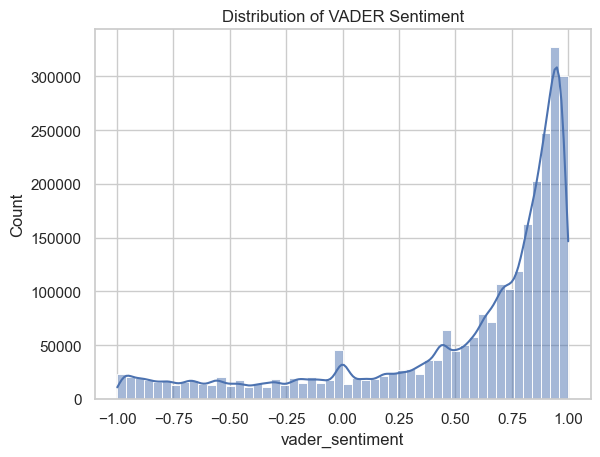

NameError: name 'skew' is not defined

In [55]:
sns.histplot(matched_df['vader_sentiment'], bins=50, kde=True)
plt.title("Distribution of VADER Sentiment")
plt.show()

# Skewness value
print("Skewness:", skew(matched_df['vader_sentiment'].dropna()))

In [54]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

# --- 2. Parse Date and Create Year Columns ---
matched_df['date'] = pd.to_datetime(matched_df['date'], errors='coerce')
matched_df['year'] = matched_df['date'].dt.year
matched_df['gdpr_year'] = matched_df['year'] - 2018

# --- 3. Keep Only Relevant Data ---
model_df = matched_df.dropna(subset=[
    'under_gdpr', 'vader_sentiment', 'year',
    'company_size_Mid_Size', 'company_size_Small',
    'seniority_level_Mid_Level', 'seniority_level_Senior',
    'CEO_Approval_Sentiment', 'Business_Outlook_Sentiment', 'Recommmend_sentiment'
]).copy()

# --- 4. Create Relative Year Dummies ---
rel_years = [-2, -1, 0, 1, 2]
for yr in rel_years:
    col = f'year_m{abs(yr)}' if yr < 0 else f'year_{yr}'
    model_df[col] = (model_df['gdpr_year'] == yr).astype(int)
    model_df[f'{col}_treated'] = model_df[col] * model_df['under_gdpr']

# --- 5. Build Formula with Covariates ---
event_terms = [f"year_m{abs(yr)}_treated" if yr < 0 else f"year_{yr}_treated" for yr in rel_years if yr != -1]

control_vars = [
    'company_size_Mid_Size',
    'company_size_Small',
    'seniority_level_Mid_Level',
    'seniority_level_Senior',
    'CEO_Approval_Sentiment',
    'Business_Outlook_Sentiment',
    'Recommmend_sentiment'
]

formula = 'vader_sentiment ~ ' + ' + '.join(event_terms + ['under_gdpr'] + control_vars)

# --- 6. Fit Model ---
event_model = smf.ols(formula=formula, data=model_df).fit()
print(event_model.summary())

# --- 7. Plot Coefficients ---
coefs = event_model.params[event_terms]
conf_int = event_model.conf_int().loc[event_terms]
years = [int(term.split('_')[1].replace('m', '-')) for term in event_terms]

event_plot_df = pd.DataFrame({
    'year': years,
    'coef': coefs.values,
    'ci_low': conf_int[0].values,
    'ci_high': conf_int[1].values
}).sort_values('year')

plt.figure(figsize=(10, 6))
sns.pointplot(data=event_plot_df, x='year', y='coef', color='blue')
plt.fill_between(event_plot_df['year'], event_plot_df['ci_low'], event_plot_df['ci_high'], alpha=0.3)
plt.axvline(0, color='red', linestyle='--', label='GDPR Enacted')
plt.axhline(0, color='black', linewidth=0.7)
plt.title('Event Study: GDPR Impact on VADER Sentiment (w/ Covariates)')
plt.xlabel('Year (Relative to 2018)')
plt.ylabel('Treatment Effect (vs. 2017)')
plt.legend()
plt.tight_layout()
plt.show()


                            OLS Regression Results                            
Dep. Variable:        vader_sentiment   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                 3.565e+04
Date:                Tue, 27 May 2025   Prob (F-statistic):               0.00
Time:                        11:38:50   Log-Likelihood:            -1.7684e+06
No. Observations:             2639670   AIC:                         3.537e+06
Df Residuals:                 2639653   BIC:                         3.537e+06
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

KeyError: "None of [Index(['year_m2_treated', 'year_0_treated', 'year_1_treated',\n       'year_2_treated'],\n      dtype='object')] are in the [index]"

##  -------------- Difference in Difference -----------------------------

In [59]:
import statsmodels.formula.api as smf

# Ensure variables are in place
matched_df['post_gdpr'] = (matched_df['date'] >= pd.Timestamp('2018-05-25')).astype(int)
matched_df['under_gdpr'] = matched_df['under_gdpr'].astype(int)  # if not already

# Create interaction term
matched_df['did'] = matched_df['post_gdpr'] * matched_df['under_gdpr']

# Fit DiD model
did_model = smf.ols('vader_sentiment ~ post_gdpr + under_gdpr + did ', data=matched_df).fit()
print(did_model.summary())


                            OLS Regression Results                            
Dep. Variable:        vader_sentiment   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1739.
Date:                Tue, 27 May 2025   Prob (F-statistic):               0.00
Time:                        13:24:12   Log-Likelihood:            -2.0240e+06
No. Observations:             2639670   AIC:                         4.048e+06
Df Residuals:                 2639666   BIC:                         4.048e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5719      0.001    961.491      0.0

In [60]:
control_vars = [
    'company_size_Mid_Size',
    'company_size_Small',
    'seniority_level_Mid_Level',
    'seniority_level_Senior',
    'CEO_Approval_Sentiment',
    'Business_Outlook_Sentiment',
    'Recommmend_sentiment'
]

formula = 'vader_sentiment ~ post_gdpr + under_gdpr + did + ' + ' + '.join(control_vars)
did_model_2 = smf.ols(formula=formula, data=matched_df).fit()
print(did_model_2.summary())


                            OLS Regression Results                            
Dep. Variable:        vader_sentiment   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                 5.666e+04
Date:                Tue, 27 May 2025   Prob (F-statistic):               0.00
Time:                        13:24:51   Log-Likelihood:            -1.7699e+06
No. Observations:             2639670   AIC:                         3.540e+06
Df Residuals:                 2639659   BIC:                         3.540e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [61]:
# Adding firm and tear fixed effects
from linearmodels.panel import PanelOLS
import pandas as pd

# Prepare panel structure
matched_df = matched_df.set_index(['company_name', 'date'])

# Create interaction manually
matched_df['did'] = matched_df['post_gdpr'] * matched_df['under_gdpr']

# Model (firm and year FEs)
fe_model = PanelOLS.from_formula(
    'vader_sentiment ~ post_gdpr + under_gdpr + did + '
    'company_size_Mid_Size + company_size_Small + '
    'seniority_level_Mid_Level + seniority_level_Senior + '
    'CEO_Approval_Sentiment + Business_Outlook_Sentiment + Recommmend_sentiment + '
    'EntityEffects + TimeEffects',
    data=matched_df
).fit(cov_type='clustered', cluster_entity=True)

print(fe_model.summary)


C:\Users\Ethan D\AppData\Local\Temp\ipykernel_13532\1717158454.py:18: MemoryWarning: Using low-memory algorithm to estimate two-way model. Explicitly set low_memory=True to silence this message.  Set low_memory=False to use the standard algorithm that creates dummy variables for the smaller of the number of entities or number of time periods.
  ).fit(cov_type='clustered', cluster_entity=True)


AbsorbingEffectError: 
The model cannot be estimated. The included effects have fully absorbed
one or more of the variables. This occurs when one or more of the dependent
variable is perfectly explained using the effects included in the model.

The following variables or variable combinations have been fully absorbed
or have become perfectly collinear after effects are removed:

          under_gdpr, company_size_Mid_Size, company_size_Small
          post_gdpr
          under_gdpr, company_size_Mid_Size, company_size_Small
          under_gdpr, company_size_Mid_Size, company_size_Small

Set drop_absorbed=True to automatically drop absorbed variables.


## ----------------------- BERT Sentiment modeling ------------------------------

In [116]:
matched_df.

<bound method NDFrame.sample of                  company_name       date  rating  \
0                 Canada Life 2019-11-12     1.0   
1                 Canada Life 2016-08-22     1.0   
2                 Canada Life 2018-07-27     2.0   
3                 Canada Life 2018-08-03     3.0   
4                 Canada Life 2017-08-23     3.0   
...                       ...        ...     ...   
2639665  Raymour and Flanigan 2017-06-01     2.0   
2639666  Raymour and Flanigan 2017-07-24     2.0   
2639667  Raymour and Flanigan 2017-11-20     2.0   
2639668  Raymour and Flanigan 2017-12-05     2.0   
2639669  Raymour and Flanigan 2017-05-17     3.0   

                                       status                           job  \
0         Current Employee, more than 3 years      Senior Software Engineer   
1                            Current Employee                Technical Lead   
2         Current Employee, more than 3 years           Actuarial Associate   
3                          

In [118]:
# Apply cleaning
matched_df['clean_full_review'] = matched_df['full_review'].apply(clean_text)

# Drop original full_review
matched_df.drop(columns=['full_review'], inplace=True)
matched_df.columns

Index(['company_name', 'date', 'rating', 'status', 'job',
       'CEO_Approval_Sentiment', 'Business_Outlook_Sentiment',
       'Recommmend_sentiment', 'eu_status', 'founded_year', 'under_gdpr',
       'industry', 'month', 'treated', 'company_size_Mid_Size',
       'company_size_Small', 'seniority_level_Mid_Level',
       'seniority_level_Senior', 'propensity_score', 'vader_sentiment', 'year',
       'gdpr_year', 'post_gdpr', 'did', 'clean_full_review'],
      dtype='object')

In [121]:
matched_df.sample(10)

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


,company_name,date,rating,status,job,CEO_Approval_Sentiment,Business_Outlook_Sentiment,Recommmend_sentiment,eu_status,founded_year,under_gdpr,industry,month,treated,company_size_Mid_Size,company_size_Small,seniority_level_Mid_Level,seniority_level_Senior,propensity_score,vader_sentiment,year,gdpr_year,post_gdpr,did,clean_full_review
2278766,Northwestern Medicine,2019-09-16,2.0,"Former Employee, more than 10 years",Manager,-1.0,1.0,-1.0,Non-EU,1981,0,Healthcare,2019-09,0,False,False,False,True,0.617867,0.9786,2019,1,1,0,great expectations with little reward the peop...
1707778,Fifth Third,2018-08-28,3.0,"Former Employee, more than 10 years",Financial Center Manager,0.5,0.5,-1.0,Non-EU,1858,0,Financial Services,2018-08,0,False,False,False,True,0.610799,0.9285,2018,0,1,0,had a lot of great years but glad to be gone b...
2300485,Kroger,2018-10-08,3.0,"Former Employee, more than 1 year",Cashier,0.0,1.0,1.0,Non-EU,1883,0,Retail,2018-10,0,False,False,False,False,0.612239,0.7140,2018,0,1,0,its a job co workers are fun and make the day ...
1146191,KPMG,2018-09-20,3.0,"Current Employee, more than 5 years",Associate Director,0.5,0.5,1.0,Non-EU,1987,1,Consulting & Business Services,2018-09,1,False,False,False,True,0.618211,-0.2153,2018,0,1,1,no respect for alumni you are good till you ar...
1654700,University of Iowa,2018-12-07,5.0,Former Employee,Anonymous Employee,0.0,0.0,0.0,Non-EU,1847,0,Education,2018-12,0,False,False,False,True,0.610164,0.6369,2018,0,1,0,teaching assistant the professors i taught for...
1184772,State Street,2019-10-18,3.0,"Former Employee, less than 1 year",Enterprise Demand Management,0.0,0.0,0.0,Non-EU,1792,1,Financial Services,2019-10,1,False,False,False,False,0.606986,0.8431,2019,1,1,1,intern very good opportunity to learn from hig...
1592994,New York Life,2019-05-01,4.0,"Former Employee, more than 3 years",Trainer,1.0,1.0,1.0,Non-EU,1845,0,Financial Services,2019-05,0,False,False,True,False,0.610049,0.9423,2019,1,1,0,awesome place great people good culture amazin...
328665,Hexaware Technologies,2018-06-19,5.0,"Former Employee, more than 3 years",Software Engineer,1.0,1.0,1.0,Non-EU,1990,1,IT & Software,2018-06,1,False,False,True,False,0.618383,0.9022,2018,0,1,1,great place to work its a great place for the ...
528050,NIKE,2019-05-22,3.0,"Current Employee, more than 5 years",Brand Planning and Operations Specialist,1.0,1.0,1.0,Non-EU,1964,1,Entertainment,2019-05,1,False,False,False,True,0.616893,0.2632,2019,1,1,1,flexible schedule but no structure beautiful c...
2268987,CHRISTUS Health,2018-05-19,4.0,"Current Employee, less than 1 year",Health Plan Configuration Auditor III,1.0,1.0,1.0,Non-EU,1999,0,Healthcare,2018-05,0,False,False,False,False,0.618898,0.9909,2018,0,0,0,great company with its challenges like any oth...


In [122]:
#matched_df.to_csv('cleaned_under_gdpr_propensity_sentiment.csv', index=False)


In [1]:
import pandas as pd
matched_df = pd.read_csv("cleaned_under_gdpr_propensity_sentiment.csv")

In [4]:
#pip install transformers

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

   ---------------------------------------- 0.0/10.5 MB ? eta -:--:--
   - -------------------------------------- 0.3/10.5 MB 9.9 MB/s eta 0:00:02
   --- ------------------------------------ 0.9/10.5 MB 14.2 MB/s eta 0:00:01
   ------ --------------------------------- 1.8/10.5 MB 16.2 MB/s eta 0:00:01
   ----------- ---------------------------- 3.1/10.5 MB 22.2 MB/s eta 0:00:01
   ------------------- -------------------- 5.1/10.5 MB 27.2 MB/s eta 0:00:01
   ------------------------------- -------- 8.2/10.5 MB 37.4 MB/s eta 0:00:01
   ---------------------------------------  10.5/10.5 MB 46.7 MB/s eta 0:00:01
   ---------------------------------------- 10.5/10.5 MB 40.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/512.1 kB ? eta -:--:--
   ---------------------------------------- 512.1/512.1 kB ? eta 0:00:00
   --------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [3]:
#pip install torch


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/212.5 MB ? eta -:--:--
   ---------------------------------------- 0.4/212.5 MB 7.6 MB/s eta 0:00:28
   ---------------------------------------- 1.0/212.5 MB 12.6 MB/s eta 0:00:17
   ---------------------------------------- 1.9/212.5 MB 15.2 MB/s eta 0:00:14
    --------------------------------------- 3.3/212.5 MB 20.9 MB/s eta 0:00:11
    --------------------------------------- 5.3/212.5 MB 25.9 MB/s eta 0:00:09
   - -------------------------------------- 8.4/212.5 MB 33.4 MB/s eta 0:00:07
   -- ------------------------------------- 12.8/212.5 MB 81.8 MB/s eta 0:00:03
   --- ----------------------------------- 17.6/212.5 MB 108.8 MB/s eta 0:00:02
   ---- ---------------------------------- 22.3/212.5 MB 131.2 MB/s eta 0:00:02
   ---- ---------------------------------- 27.1/212.5 MB 131.2 MB/s eta 0:00:02
   ----- --------------------------------- 31.2/212.5 MB 1

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [4]:
matched_df.sample(10)

,company_name,date,rating,status,job,CEO_Approval_Sentiment,Business_Outlook_Sentiment,Recommmend_sentiment,eu_status,founded_year,...,company_size_Small,seniority_level_Mid_Level,seniority_level_Senior,propensity_score,vader_sentiment,year,gdpr_year,post_gdpr,did,clean_full_review
1114645,Staples,2016-12-02,2.0,"Current Employee, more than 10 years",Anonymous Employee,0.5,-1.0,-1.0,Non-EU,1986,...,False,False,True,0.618153,-0.8870,2016,-2,0,0,warehouse overall not many pros that i know of...
1717662,Ingles Markets,2017-01-13,1.0,"Current Employee, more than 3 years",Grocery Stocker,-1.0,-1.0,-1.0,Non-EU,1963,...,False,True,False,0.616836,0.0577,2017,-1,0,0,what a joke i laughed out loud when i tried to...
2134787,Maybank,2018-12-31,2.0,Former Employee,Anonymous Employee,0.0,0.0,-1.0,Non-EU,1960,...,False,False,True,0.616664,-0.2547,2018,0,1,0,not recommend good pay increment benefit bonus...
730023,Whole Foods Market,2016-05-25,4.0,Current Employee,Anonymous Employee,0.5,1.0,1.0,Non-EU,1980,...,False,False,True,0.617810,0.8313,2016,-2,0,0,cashier friendly coworkers and environment the...
1248995,IHS Markit,2017-08-09,3.0,"Current Employee, more than 5 years",Anonymous Employee,0.5,0.5,1.0,Non-EU,1959,...,False,False,True,0.616607,0.9372,2017,-1,0,0,good place to start friendly colleagues good w...
617704,Boston Consulting Group,2019-11-06,4.0,"Current Employee, less than 1 year",Associate,0.5,1.0,1.0,Non-EU,1963,...,False,False,False,0.616836,0.9817,2019,1,1,1,challenging environment with rewarding experie...
620974,Parker Hannifin,2019-08-20,5.0,"Former Employee, less than 1 year",Assembler,0.0,0.0,0.0,Non-EU,1917,...,False,False,False,0.614195,0.5574,2019,1,1,1,only doing this to unlock the ability to read ...
1509845,J.P. Morgan,2019-04-16,5.0,"Current Employee, more than 3 years",Events Specialist,0.0,0.0,0.0,Non-EU,2000,...,False,True,False,0.618955,0.9385,2019,1,1,0,great great place to work awesome benefits not...
1262791,Sanofi,2018-06-01,3.0,"Former Employee, more than 1 year",Analyst,-1.0,-1.0,-1.0,EU,2004,...,False,False,False,0.619183,0.3400,2018,0,1,1,no strategy global business and benefits good ...
2073534,Ross Stores,2016-07-21,4.0,"Former Employee, more than 3 years",Area Supervisor,0.5,1.0,1.0,Non-EU,1982,...,False,True,False,0.617925,-0.6341,2016,-2,0,0,solid first job ross is a really good place if...


## Vader parallel trends lags and leads

In [4]:
sample_df.columns

Index(['company_name', 'date', 'rating', 'status', 'job',
       'CEO_Approval_Sentiment', 'Business_Outlook_Sentiment',
       'Recommmend_sentiment', 'eu_status', 'founded_year', 'under_gdpr',
       'industry', 'month', 'treated', 'company_size_Mid_Size',
       'company_size_Small', 'seniority_level_Mid_Level',
       'seniority_level_Senior', 'propensity_score', 'vader_sentiment', 'year',
       'gdpr_year', 'post_gdpr', 'did', 'clean_review', 'truncated_review',
       'bert_star_rating', 'bert_star_cat', 'year_m2', 'year_m2_treated',
       'year_0', 'year_0_treated', 'year_1', 'year_1_treated', 'year_2',
       'year_2_treated'],
      dtype='object')

In [30]:
# Reuse the same event terms
event_terms = [f"year_sans2_treated", f"year_0_treated", f"year_1_treated", f"year_2_treated"]

# Reuse the covariates from your BERT model
covariates = [
    'company_size_Mid_Size',
    'company_size_Small',
    'seniority_level_Mid_Level',
    'seniority_level_Senior',
    'CEO_Approval_Sentiment',
    'Business_Outlook_Sentiment',
    'Recommmend_sentiment',
    'C(year)'
]

# Combine into formula
vader_formula = 'vader_sentiment ~ ' + ' + '.join(event_terms + covariates)


In [31]:
import statsmodels.formula.api as smf

# Fit model
event_model_vader = smf.ols(
    formula=vader_formula,
    data=sample_df.dropna(subset=['vader_sentiment'])
).fit()

print(event_model_vader.summary())


                            OLS Regression Results                            
Dep. Variable:        vader_sentiment   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     412.0
Date:                Mon, 02 Jun 2025   Prob (F-statistic):               0.00
Time:                        12:52:33   Log-Likelihood:                -20339.
No. Observations:               30000   AIC:                         4.071e+04
Df Residuals:                   29984   BIC:                         4.084e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [33]:
import pandas as pd

# Extract relevant results
coefs_vader = event_model_vader.params
conf_int_vader = event_model_vader.conf_int()
pvals_vader = event_model_vader.pvalues

# Event time labels
rel_years = [-2, 0, 1, 2]
event_times = rel_years
event_terms = [f"year_sans{abs(yr)}_treated" if yr < 0 else f"year_{yr}_treated" for yr in rel_years]

# Create plot data DataFrame
plot_data_vader = pd.DataFrame({
    'event_time': event_times,
    'coef': [coefs_vader[term] for term in event_terms],
    'ci_lower': [conf_int_vader.loc[term, 0] for term in event_terms],
    'ci_upper': [conf_int_vader.loc[term, 1] for term in event_terms],
    'pval': [pvals_vader[term] for term in event_terms]
})

# Mark significance
plot_data_vader['significant'] = plot_data_vader['pval'] < 0.05


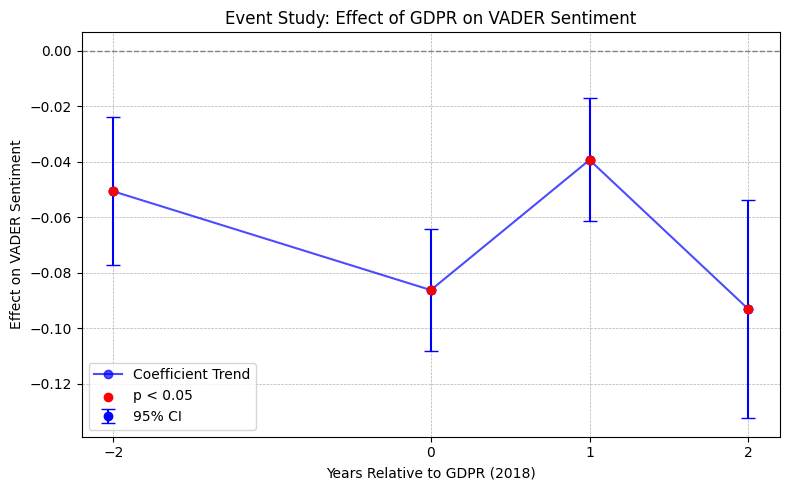

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

# Line for coefficients
plt.plot(
    plot_data_vader['event_time'],
    plot_data_vader['coef'],
    linestyle='-',
    marker='o',
    color='blue',
    alpha=0.7,
    label='Coefficient Trend'
)

# Error bars
plt.errorbar(
    plot_data_vader['event_time'], plot_data_vader['coef'],
    yerr=[plot_data_vader['coef'] - plot_data_vader['ci_lower'], plot_data_vader['ci_upper'] - plot_data_vader['coef']],
    fmt='o', capsize=5, color='blue', label='95% CI'
)

# Highlight significant points
plt.scatter(
    plot_data_vader['event_time'][plot_data_vader['significant']],
    plot_data_vader['coef'][plot_data_vader['significant']],
    color='red', zorder=5, label='p < 0.05'
)

# Reference line
plt.axhline(0, color='gray', linestyle='--', linewidth=1)

# Formatting
plt.title('Event Study: Effect of GDPR on VADER Sentiment')
plt.xlabel('Years Relative to GDPR (2018)')
plt.ylabel('Effect on VADER Sentiment')
plt.xticks(plot_data_vader['event_time'])
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()


In [14]:
# --- 1. Imports ---
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TextClassificationPipeline

# --- 2. Load BERT Star Rating Model (1–5 stars) ---
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
star_pipeline = TextClassificationPipeline(model=model, tokenizer=tokenizer)

# --- 3. Text Cleaning Function ---
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# --- 4. Sample Full DataFrame (keep all metadata) ---
sample_df = matched_df.dropna(subset=['clean_full_review', 'date', 'month']).sample(30000, random_state=42).copy()

# --- 5. Clean + Truncate Text for BERT ---
sample_df['clean_review'] = sample_df['clean_full_review'].apply(clean_text)
sample_df['truncated_review'] = sample_df['clean_review'].apply(lambda x: x[:1000])  # safe limit for BERT input
sample_df = sample_df.drop(columns=['clean_full_review'])

# --- 6. Predict 1–5 Star Ratings ---
def get_star_rating(text):
    label = star_pipeline(text)[0]['label']  # e.g., '4 stars'
    return int(label[0])  # extract the digit

sample_df['bert_star_rating'] = sample_df['truncated_review'].apply(get_star_rating)

# --- 7. Optional: Categorize Star Ratings ---
def categorize_star_rating(star):
    if star >= 4:
        return "positive"
    elif star <= 2:
        return "negative"
    else:
        return "neutral"

sample_df['bert_star_cat'] = sample_df['bert_star_rating'].apply(categorize_star_rating)

# --- 8. Visualize Star Rating Distribution ---


Device set to use cpu


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


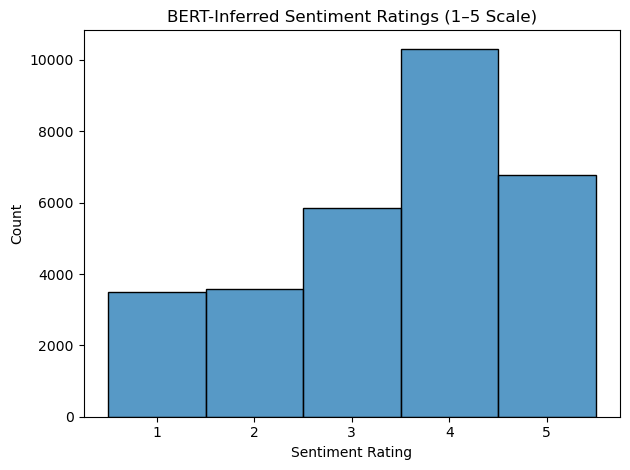

In [15]:
sns.histplot(sample_df['bert_star_rating'], bins=5, discrete=True)
plt.title("BERT-Inferred Sentiment Ratings (1–5 Scale)")
plt.xlabel("Sentiment Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [24]:
sample_df.to_csv("sample_30k.csv", index=False)



In [1]:
import pandas as pd
sample_df = pd.read_csv("sample_30k.csv", encoding = "latin1")

In [4]:
pd.set_option('display.max_columns', None)


In [5]:
sample_df.sample(10)

,company_name,date,rating,status,job,CEO_Approval_Sentiment,Business_Outlook_Sentiment,Recommmend_sentiment,eu_status,founded_year,under_gdpr,industry,month,treated,company_size_Mid_Size,company_size_Small,seniority_level_Mid_Level,seniority_level_Senior,propensity_score,vader_sentiment,year,gdpr_year,post_gdpr,did,clean_review,truncated_review,bert_star_rating,bert_star_cat,year_m2,year_m2_treated,year_0,year_0_treated,year_1,year_1_treated,year_2,year_2_treated
2126,BlackRock,2019-10-14,4.0,"Former Employee, more than 3 years",Director,1.0,1.0,1.0,Non-EU,1988,1,Financial Services,2019-10,1,False,False,True,False,0.618268,0.6908,2019,1,1,1,financial services there are a lot of talented...,financial services there are a lot of talented...,3,neutral,0,0,0,0,1,1,0,0
4450,Muthoot Finance,2019-12-13,5.0,"Former Employee, more than 8 years",Branch Manager,1.0,1.0,1.0,Non-EU,1939,0,Financial Services,2019-12,0,False,False,False,True,0.615459,0.6997,2019,1,1,0,achieve targets work under pressure with very ...,achieve targets work under pressure with very ...,4,positive,0,0,0,0,1,0,0,0
26918,Mattel,2017-08-03,4.0,Former Employee,Seasonal Toy Store Associate,0.5,1.0,1.0,Non-EU,1945,1,Electronics & Manufacturing,2017-08,1,False,False,False,True,0.615803,0.9699,2017,-1,0,0,fun place to work overall a good experience fr...,fun place to work overall a good experience fr...,4,positive,0,0,0,0,0,0,0,0
1977,Georgetown University,2019-06-30,4.0,"Current Employee, more than 3 years",Program Specialist,1.0,1.0,1.0,Non-EU,1789,0,Education,2019-06,0,False,False,True,False,0.606813,0.9744,2019,1,1,0,great benefits great worklife balance great be...,great benefits great worklife balance great be...,5,positive,0,0,0,0,1,0,0,0
5770,Infor,2018-01-31,2.0,"Former Employee, more than 3 years",Consultant,0.5,-1.0,-1.0,Non-EU,2002,1,IT & Software,2018-01,1,False,False,True,False,0.619069,-0.6435,2018,0,0,0,management doesnt care about its people you ca...,management doesnt care about its people you ca...,1,negative,0,0,1,1,0,0,0,0
1609,EY,2019-04-01,4.0,"Current Employee, more than 3 years",Advisory Senior Consultant,1.0,1.0,1.0,Non-EU,1989,1,Consulting & Business Services,2019-04,1,False,False,True,False,0.618325,0.8519,2019,1,1,1,ey fast growth environment work with great tea...,ey fast growth environment work with great tea...,4,positive,0,0,0,0,1,1,0,0
11693,Chase,2016-05-31,4.0,"Current Employee, more than 5 years",Anonymous Employee,0.0,0.0,1.0,Non-EU,1799,1,Financial Services,2016-05,1,False,False,False,True,0.607391,0.6249,2016,-2,0,0,supervisor great atmosphere and environment to...,supervisor great atmosphere and environment to...,5,positive,1,1,0,0,0,0,0,0
4004,Northwestern Medicine,2019-10-01,4.0,"Former Employee, more than 1 year",Patient Service Representative,0.0,0.0,1.0,Non-EU,1981,0,Healthcare,2019-10,0,False,False,False,False,0.617867,0.9062,2019,1,1,0,good place to work opportunities for growth wi...,good place to work opportunities for growth wi...,4,positive,0,0,0,0,1,0,0,0
13132,Vons,2019-02-01,2.0,"Current Employee, more than 10 years",Checker,0.0,0.0,0.0,Non-EU,1906,0,Food & Beverage,2019-02,0,False,False,False,True,0.613563,0.9801,2019,1,1,0,good at first but you cant move up if youre no...,good at first but you cant move up if youre no...,3,neutral,0,0,0,0,1,0,0,0
1256,Wipro,2016-09-09,3.0,Former Employee,Anonymous Employee,0.0,0.0,0.0,Non-EU,1945,1,IT & Software,2016-09,1,False,False,False,True,0.615803,0.2500,2016,-2,0,0,employment some are good projects involving la...,employment some are good projects involving la...,3,neutral,1,1,0,0,0,0,0,0


Average divergence (overall): 0.715
Average divergence (treated): 0.7033326654645028
Average divergence (control): 0.726625407599654

Divergence in treated firms, pre/post GDPR:
 post_gdpr
0    0.722869
1    0.683867
Name: divergence, dtype: float64


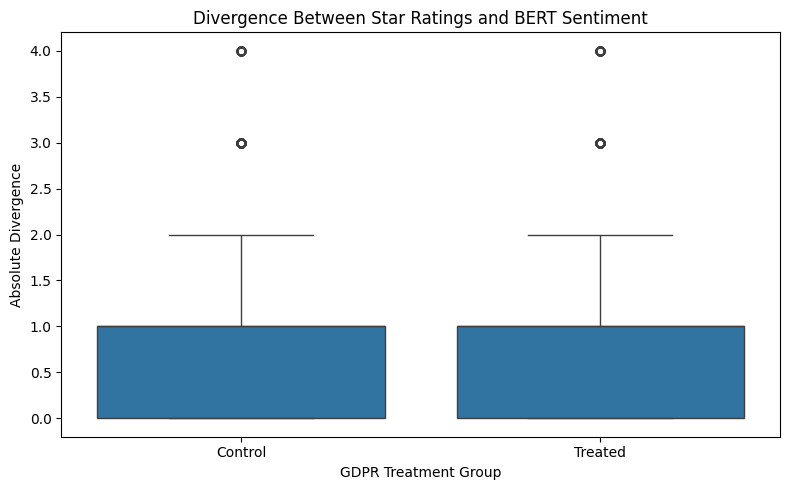

In [14]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame
df = sample_df.copy()

# Step 1: Ensure numeric types
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['bert_star_rating'] = pd.to_numeric(df['bert_star_rating'], errors='coerce')

# Step 2: Calculate absolute divergence between rating and BERT-based sentiment
df['divergence'] = np.abs(df['rating'] - df['bert_star_rating'])

# Optional: Flag large divergence (e.g., ≥ 2 stars difference)
df['divergence_flag'] = df['divergence'] >= 2

# Step 3: Summary statistics
print("Average divergence (overall):", df['divergence'].mean())
print("Average divergence (treated):", df[df['treated'] == 1]['divergence'].mean())
print("Average divergence (control):", df[df['treated'] == 0]['divergence'].mean())

# Step 4: Compare divergence pre/post GDPR (for treated)
divergence_summary = df[df['treated'] == 1].groupby('post_gdpr')['divergence'].mean()
print("\nDivergence in treated firms, pre/post GDPR:\n", divergence_summary)

# Step 5: Optional - Visualize
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='treated', y='divergence')
plt.xticks([0, 1], ['Control', 'Treated'])
plt.title('Divergence Between Star Ratings and BERT Sentiment')
plt.xlabel('GDPR Treatment Group')
plt.ylabel('Absolute Divergence')
plt.tight_layout()
plt.show()


In [15]:
import pandas as pd
import statsmodels.formula.api as smf

# Step 1: Ensure numeric and create divergence
df = sample_df.copy()
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['bert_star_rating'] = pd.to_numeric(df['bert_star_rating'], errors='coerce')
df['divergence'] = (df['rating'] - df['bert_star_rating']).abs()

# Step 2: Drop missing data
did_data = df.dropna(subset=['divergence', 'treated', 'post_gdpr'])

# Step 3: Run DiD regression
model = smf.ols('divergence ~ treated * post_gdpr + C(year)', data=did_data).fit()

# Step 4: Print result
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             divergence   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     11.54
Date:                Sat, 14 Jun 2025   Prob (F-statistic):           1.00e-14
Time:                        16:17:15   Log-Likelihood:                -34836.
No. Observations:               30000   AIC:                         6.969e+04
Df Residuals:                   29992   BIC:                         6.976e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.6955      0.01

## --------------- Parallel trends check ----------------------------

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


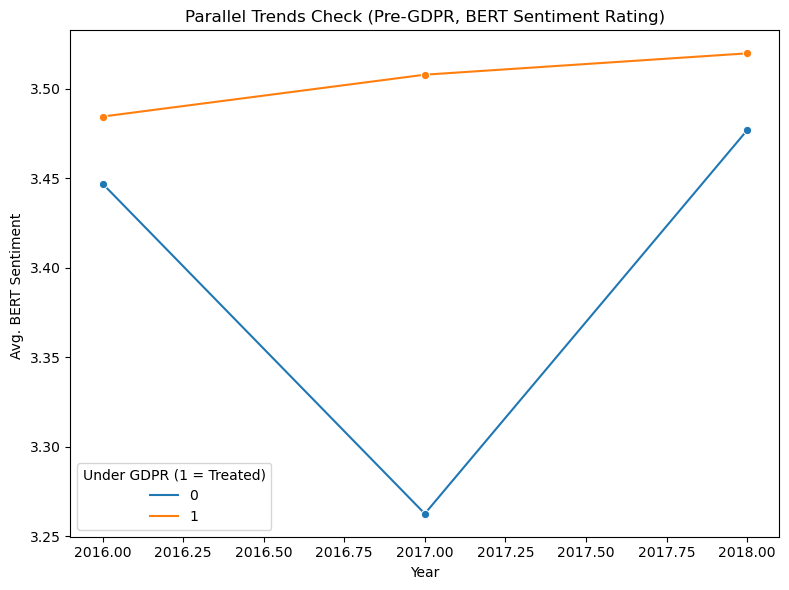

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter pre-GDPR observations
pre_df = sample_df[sample_df['post_gdpr'] == 0]

# Group by year and treatment status
pre_trends = pre_df.groupby(['year', 'under_gdpr'])['bert_star_rating'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 6))
sns.lineplot(data=pre_trends, x='year', y='bert_star_rating', hue='under_gdpr', marker='o')
plt.title("Parallel Trends Check (Pre-GDPR, BERT Sentiment Rating)")
plt.xlabel("Year")
plt.ylabel("Avg. BERT Sentiment ")
plt.legend(title="Under GDPR (1 = Treated)")
plt.tight_layout()
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


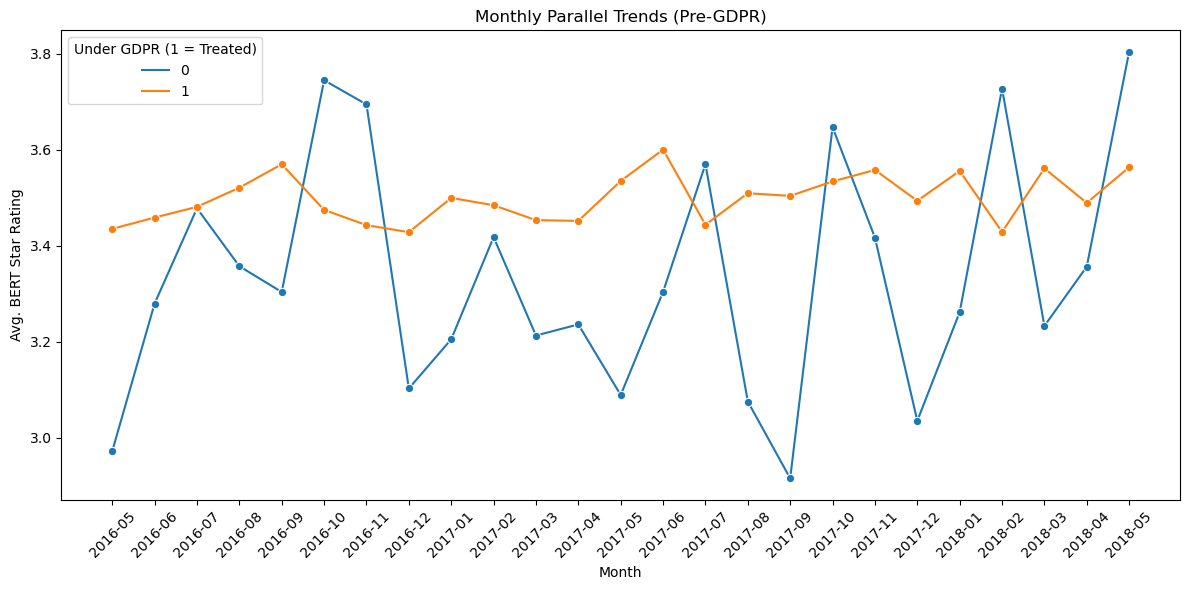

In [18]:
### Checking the trend month# 2. Create 'year_month' column
#sample_df['year_month'] = sample_df['date'].dt.to_period('M').astype(str)

# 3. Filter pre-GDPR period only
pre_gdpr_df = sample_df[sample_df['post_gdpr'] == 0]

# 4. Group by month and treatment status
monthly_trends = (
    pre_gdpr_df
    .groupby(['month', 'under_gdpr'])['bert_star_rating']
    .mean()
    .reset_index()
)

# 5. Plot monthly trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trends, x='month', y='bert_star_rating', hue='under_gdpr', marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Parallel Trends (Pre-GDPR)")
plt.xlabel("Month")
plt.ylabel("Avg. BERT Star Rating")
plt.legend(title="Under GDPR (1 = Treated)")
plt.tight_layout()
plt.show()


In [11]:
# 1. Create 'year_quarter' column
sample_df['year_quarter'] = sample_df['date'].dt.to_period('Q').astype(str)

# 2. Filter pre-GDPR period only
pre_gdpr_df = sample_df[sample_df['post_gdpr'] == 0]

# 3. Group by quarter and treatment status
quarterly_trends = (
    pre_gdpr_df
    .groupby(['year_quarter', 'under_gdpr'])['bert_star_rating']
    .mean()
    .reset_index()
)

# 4. Sort year_quarter for proper time order
quarterly_trends = quarterly_trends.sort_values('year_quarter')

# 5. Plot quarterly trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=quarterly_trends, x='year_quarter', y='bert_star_rating', hue='under_gdpr', marker='o')
plt.xticks(rotation=45)
plt.title("Quarterly Parallel Trends (Pre-GDPR)")
plt.xlabel("Quarter")
plt.ylabel("Avg. BERT Sentiment Rating")
plt.legend(title="Under GDPR (1 = Treated)")
plt.tight_layout()
plt.show()


AttributeError: Can only use .dt accessor with datetimelike values

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


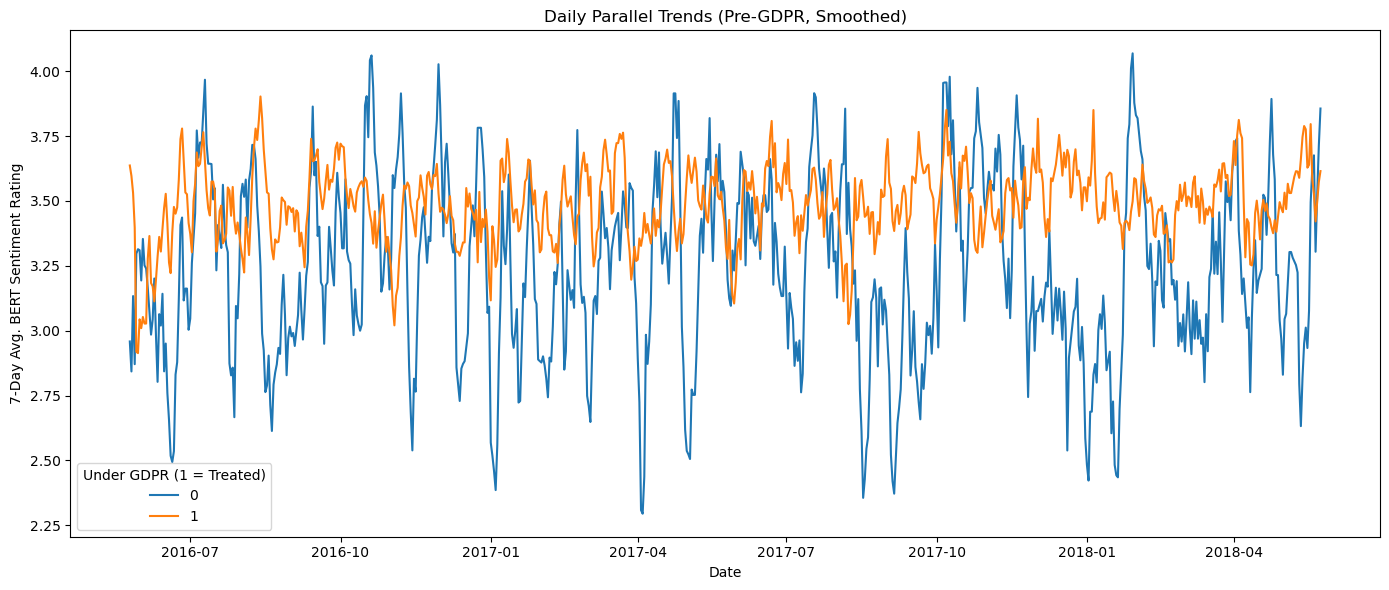

In [19]:
# 1. Ensure date is in datetime format
sample_df['date'] = pd.to_datetime(sample_df['date'], errors='coerce')

# 2. Filter pre-GDPR period only
pre_gdpr_df = sample_df[sample_df['post_gdpr'] == 0].copy()

# 3. Group by date and treatment status
daily_trends = (
    pre_gdpr_df
    .groupby(['date', 'under_gdpr'])['bert_star_rating']
    .mean()
    .reset_index()
)

# 4. Apply 7-day rolling average (optional but recommended for clarity)
daily_trends['rolling_avg'] = (
    daily_trends
    .groupby('under_gdpr')['bert_star_rating']
    .transform(lambda x: x.rolling(window=7, min_periods=1).mean())
)

# 5. Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_trends, x='date', y='rolling_avg', hue='under_gdpr')
plt.title("Daily Parallel Trends (Pre-GDPR, Smoothed)")
plt.xlabel("Date")
plt.ylabel("7-Day Avg. BERT Sentiment Rating")
plt.legend(title="Under GDPR (1 = Treated)")
plt.tight_layout()
plt.show()


In [20]:
import statsmodels.formula.api as smf

# Drop rows with missing outcome or covariates
did_df = sample_df.dropna(subset=[
    'bert_star_rating', 'post_gdpr', 'under_gdpr', 'did',
    'company_size_Mid_Size', 'company_size_Small',
    'seniority_level_Mid_Level', 'seniority_level_Senior',
    'CEO_Approval_Sentiment', 'Business_Outlook_Sentiment', 'Recommmend_sentiment','year'
])

# Construct formula
covariates = [
    'company_size_Mid_Size',
    'company_size_Small',
    'seniority_level_Mid_Level',
    'seniority_level_Senior',
    'CEO_Approval_Sentiment',
    'Business_Outlook_Sentiment',
    'Recommmend_sentiment',
   # 'C(company_name)',  # firm fixed effects
    'C(year)'           # year fixed effects
]

formula = 'bert_star_rating ~ post_gdpr + under_gdpr + did + ' + ' + '.join(covariates)

# Fit model
did_fe_model = smf.ols(formula=formula, data=did_df).fit()
print(did_fe_model.summary())


                            OLS Regression Results                            
Dep. Variable:       bert_star_rating   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     917.0
Date:                Sun, 01 Jun 2025   Prob (F-statistic):               0.00
Time:                        14:13:40   Log-Likelihood:                -44590.
No. Observations:               30000   AIC:                         8.921e+04
Df Residuals:                   29985   BIC:                         8.933e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [29]:
sample_df.columns

Index(['company_name', 'date', 'rating', 'status', 'job',
       'CEO_Approval_Sentiment', 'Business_Outlook_Sentiment',
       'Recommmend_sentiment', 'eu_status', 'founded_year', 'under_gdpr',
       'industry', 'month', 'treated', 'company_size_Mid_Size',
       'company_size_Small', 'seniority_level_Mid_Level',
       'seniority_level_Senior', 'propensity_score', 'vader_sentiment', 'year',
       'gdpr_year', 'post_gdpr', 'did', 'clean_review', 'truncated_review',
       'bert_star_rating', 'bert_star_cat', 'year_m2', 'year_m2_treated',
       'year_0', 'year_0_treated', 'year_1', 'year_1_treated', 'year_2',
       'year_2_treated', 'year_sans2', 'year_sans2_treated', 'gdpr_month',
       'month_sans12', 'month_sans12_treated', 'month_sans11',
       'month_sans11_treated', 'month_sans10', 'month_sans10_treated',
       'month_sans9', 'month_sans9_treated', 'month_sans8',
       'month_sans8_treated', 'month_sans7', 'month_sans7_treated',
       'month_sans6', 'month_sans6_treated'

In [8]:
# --- 1. Define GDPR-relative event time ---
sample_df['gdpr_year'] = sample_df['year'] - 2018  # GDPR enacted in 2018

# --- 2. Create lags and leads (dummy variables for each relative year) ---
rel_years = [-2, 0, 1, 2]  # Skip -1 (reference year)

for yr in rel_years:
    base = f"year_sans{abs(yr)}" if yr < 0 else f"year_{yr}"
    sample_df[base] = (sample_df['gdpr_year'] == yr).astype(int)
    sample_df[f"{base}_treated"] = sample_df[base] * sample_df['under_gdpr']

# --- 3. Define model formula with interactions, covariates, and fixed effects ---
event_terms = [f"year_sans{abs(yr)}_treated" if yr < 0 else f"year_{yr}_treated" for yr in rel_years]

covariates = [
    'company_size_Mid_Size',
    'company_size_Small',
    'seniority_level_Mid_Level',
    'seniority_level_Senior',
    'CEO_Approval_Sentiment',
    'Business_Outlook_Sentiment',
    'Recommmend_sentiment',
    #'C(company_name)',  # firm fixed effects
    'C(year)'           # year fixed effects
]

formula = 'bert_star_rating ~ ' + ' + '.join(event_terms + covariates)

# --- 4. Fit OLS model ---
import statsmodels.formula.api as smf

event_model = smf.ols(formula=formula, data=sample_df.dropna(subset=['bert_star_rating'])).fit()
print(event_model.summary())


                            OLS Regression Results                            
Dep. Variable:       bert_star_rating   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     850.8
Date:                Mon, 02 Jun 2025   Prob (F-statistic):               0.00
Time:                        12:33:11   Log-Likelihood:                -44617.
No. Observations:               30000   AIC:                         8.927e+04
Df Residuals:                   29984   BIC:                         8.940e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

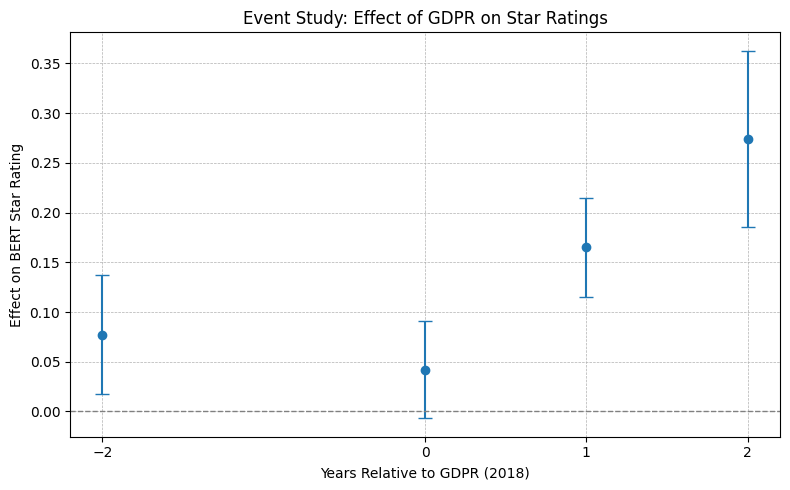

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

# --- 1. Extract relevant results from the model ---
coefs = event_model.params
conf_int = event_model.conf_int()
pvalues = event_model.pvalues

# Event time labels
rel_years = [-2, 0, 1, 2]
event_terms = [f"year_sans{abs(yr)}_treated" if yr < 0 else f"year_{yr}_treated" for yr in rel_years]
event_times = [yr for yr in rel_years]

# Prepare data for plotting
plot_data = pd.DataFrame({
    'event_time': event_times,
    'coef': [coefs[term] for term in event_terms],
    'ci_lower': [conf_int.loc[term, 0] for term in event_terms],
    'ci_upper': [conf_int.loc[term, 1] for term in event_terms],
    'pval': [pvalues[term] for term in event_terms]
})

# --- 2. Plot ---
plt.figure(figsize=(8, 5))

# Coefficient points
plt.errorbar(
    plot_data['event_time'], plot_data['coef'],
    yerr=[plot_data['coef'] - plot_data['ci_lower'], plot_data['ci_upper'] - plot_data['coef']],
    fmt='o', capsize=5, label='95% CI'
)

# Add horizontal line at 0
plt.axhline(0, color='gray', linestyle='--', linewidth=1)

# Formatting
plt.title('Event Study: Effect of GDPR on Star Ratings')
plt.xlabel('Years Relative to GDPR (2018)')
plt.ylabel('Effect on BERT Star Rating')
plt.xticks(plot_data['event_time'])
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()


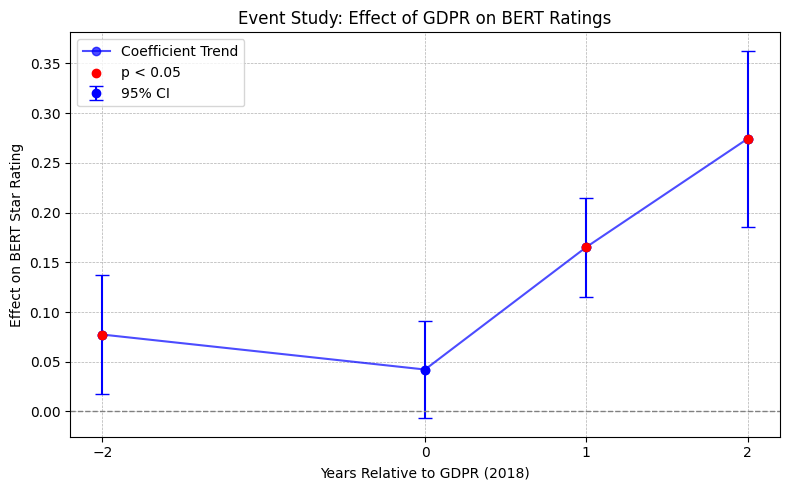

In [28]:
import matplotlib.pyplot as plt

# Mark significant points
plot_data['significant'] = plot_data['pval'] < 0.05

plt.figure(figsize=(8, 5))

# Line connecting coefficients
plt.plot(
    plot_data['event_time'],
    plot_data['coef'],
    linestyle='-',
    marker='o',
    color='blue',
    alpha=0.7,
    label='Coefficient Trend'
)

# Coefficient points with error bars
plt.errorbar(
    plot_data['event_time'], plot_data['coef'],
    yerr=[plot_data['coef'] - plot_data['ci_lower'], plot_data['ci_upper'] - plot_data['coef']],
    fmt='o', capsize=5, color='blue', label='95% CI'
)

# Significant coefficients (p < 0.05)
plt.scatter(
    plot_data['event_time'][plot_data['significant']],
    plot_data['coef'][plot_data['significant']],
    color='red', zorder=5, label='p < 0.05'
)

# Zero reference line
plt.axhline(0, color='gray', linestyle='--', linewidth=1)

# Labels and formatting
plt.title('Event Study: Effect of GDPR on BERT Ratings')
plt.xlabel('Years Relative to GDPR (2018)')
plt.ylabel('Effect on BERT Star Rating')
plt.xticks(plot_data['event_time'])
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()


## Rating as depednent variable

In [2]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Step 1: Create relative year from GDPR (2018)
sample_df['date'] = pd.to_datetime(sample_df['date'])
sample_df['gdpr_year'] = sample_df['date'].dt.year - 2018

# Step 2: Create leads/lags (excluding -1 as the reference year)
rel_years = [-2, 0, 1, 2]
for yr in rel_years:
    base = f"year_sans{abs(yr)}" if yr < 0 else f"year_{yr}"
    sample_df[base] = (sample_df['gdpr_year'] == yr).astype(int)
    sample_df[f"{base}_treated"] = sample_df[base] * sample_df['under_gdpr']

# Step 3: Build the regression formula
event_terms = [f"year_sans{abs(yr)}_treated" if yr < 0 else f"year_{yr}_treated" for yr in rel_years]
covariates = [
    'company_size_Mid_Size',
    'company_size_Small',
    'seniority_level_Mid_Level',
    'seniority_level_Senior',
    'CEO_Approval_Sentiment',
    'Business_Outlook_Sentiment',
    'Recommmend_sentiment',
    'C(year)'
]

formula = 'rating ~ ' + ' + '.join(event_terms + covariates)

# Step 4: Fit the model
event_model = smf.ols(formula=formula, data=sample_df.dropna(subset=['rating'])).fit()
print(event_model.summary())


                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     1977.
Date:                Mon, 02 Jun 2025   Prob (F-statistic):               0.00
Time:                        20:38:17   Log-Likelihood:                -38955.
No. Observations:               30000   AIC:                         7.794e+04
Df Residuals:                   29984   BIC:                         7.807e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

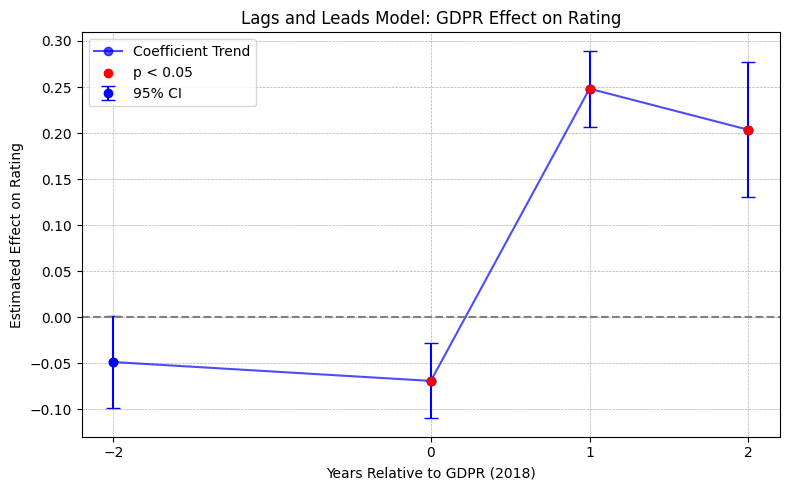

In [3]:
# Extract model results
coefs = event_model.params
conf_int = event_model.conf_int()
pvals = event_model.pvalues

# Prepare plot data
plot_data = pd.DataFrame({
    'event_time': rel_years,
    'coef': [coefs[f"year_sans{abs(yr)}_treated"] if yr < 0 else coefs[f"year_{yr}_treated"] for yr in rel_years],
    'ci_lower': [conf_int.loc[f"year_sans{abs(yr)}_treated", 0] if yr < 0 else conf_int.loc[f"year_{yr}_treated", 0] for yr in rel_years],
    'ci_upper': [conf_int.loc[f"year_sans{abs(yr)}_treated", 1] if yr < 0 else conf_int.loc[f"year_{yr}_treated", 1] for yr in rel_years],
    'pval': [pvals[f"year_sans{abs(yr)}_treated"] if yr < 0 else pvals[f"year_{yr}_treated"] for yr in rel_years]
})

plot_data['significant'] = plot_data['pval'] < 0.05

# Plot
plt.figure(figsize=(8, 5))

# Coeff trend line
plt.plot(plot_data['event_time'], plot_data['coef'], linestyle='-', marker='o', color='blue', alpha=0.7, label='Coefficient Trend')

# Error bars (95% CI)
plt.errorbar(
    plot_data['event_time'], plot_data['coef'],
    yerr=[plot_data['coef'] - plot_data['ci_lower'], plot_data['ci_upper'] - plot_data['coef']],
    fmt='o', capsize=5, color='blue', label='95% CI'
)

# Highlight significant points
plt.scatter(
    plot_data['event_time'][plot_data['significant']],
    plot_data['coef'][plot_data['significant']],
    color='red', zorder=5, label='p < 0.05'
)

# Reference line at 0
plt.axhline(0, color='gray', linestyle='--')

# Formatting
plt.title('Lags and Leads Model: GDPR Effect on Rating')
plt.xlabel('Years Relative to GDPR (2018)')
plt.ylabel('Estimated Effect on Rating')
plt.xticks(plot_data['event_time'])
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()


In [1]:
import pandas as pd
import statsmodels.formula.api as smf

sample_df = pd.read_csv("sample_30k.csv", encoding = "latin-1")


In [2]:
sample_df.columns

Index(['company_name', 'date', 'rating', 'status', 'job',
       'CEO_Approval_Sentiment', 'Business_Outlook_Sentiment',
       'Recommmend_sentiment', 'eu_status', 'founded_year', 'under_gdpr',
       'industry', 'month', 'treated', 'company_size_Mid_Size',
       'company_size_Small', 'seniority_level_Mid_Level',
       'seniority_level_Senior', 'propensity_score', 'vader_sentiment', 'year',
       'gdpr_year', 'post_gdpr', 'did', 'clean_review', 'truncated_review',
       'bert_star_rating', 'bert_star_cat', 'year_m2', 'year_m2_treated',
       'year_0', 'year_0_treated', 'year_1', 'year_1_treated', 'year_2',
       'year_2_treated'],
      dtype='object')

In [4]:
# Step 1: Define the 'post' treatment indicator
sample_df['date'] = pd.to_datetime(sample_df['date'])
sample_df['post_gdpr'] = (sample_df['date'].dt.year >= 2018).astype(int)

# Step 2: Create the interaction term
sample_df['post_treated'] = sample_df['post_gdpr'] * sample_df['under_gdpr']

# Step 3: Define covariates
covariates = [
    'C(year)'  # Optional fixed effects for year
    'C(company_name)'
]

# Step 4: Build the formula
did_formula = 'rating ~ post_gdpr + under_gdpr + post_treated + ' + ' + '.join(covariates)

# Step 5: Fit the model
did_model = smf.ols(formula=did_formula, data=sample_df.dropna(subset=['rating'])).fit()
print(did_model.summary())


                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     2100.
Date:                Mon, 02 Jun 2025   Prob (F-statistic):               0.00
Time:                        20:40:08   Log-Likelihood:                -39018.
No. Observations:               30000   AIC:                         7.807e+04
Df Residuals:                   29985   BIC:                         7.819e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

## monthly coefficient event study

In [6]:
import pandas as pd
import statsmodels.formula.api as smf

# Step 1: Copy original dataframe
sample_df_bert_eventstudy = sample_df.copy()

# Step 2: Convert and extract event time
sample_df_bert_eventstudy['date'] = pd.to_datetime(sample_df_bert_eventstudy['date'])
gdpr_date = pd.Timestamp("2018-05-01")
sample_df_bert_eventstudy['gdpr_month'] = (
    (sample_df_bert_eventstudy['date'].dt.year - gdpr_date.year) * 12 +
    (sample_df_bert_eventstudy['date'].dt.month - gdpr_date.month)
)

# Step 3: Define relative months (event window)
rel_months = list(range(-12, 13))
rel_months.remove(-1)  # reference period

# Step 4: Create dummy variables and interactions with treatment
event_terms = []

for m in rel_months:
    col_base = f"m{abs(m)}{'pre' if m < 0 else 'post'}"
    sample_df_bert_eventstudy[col_base] = (sample_df_bert_eventstudy['gdpr_month'] == m).astype(int)
    interaction_col = f"{col_base}_treated"
    sample_df_bert_eventstudy[interaction_col] = sample_df_bert_eventstudy[col_base] * sample_df_bert_eventstudy['under_gdpr']
    event_terms.append(interaction_col)

# Step 5: Add fixed effects for time and firm
sample_df_bert_eventstudy['month'] = sample_df_bert_eventstudy['date'].dt.to_period('M').astype(str)
covariates = ['C(month)', 'C(company_name)']

# Step 6: Build and fit the model
formula = 'bert_star_rating ~ ' + ' + '.join(event_terms + covariates)

monthly_event_model = smf.ols(
    formula=formula,
    data=sample_df_bert_eventstudy.dropna(subset=['bert_star_rating'])
).fit()

# Step 7: Print results
print(monthly_event_model.summary())


                            OLS Regression Results                            
Dep. Variable:       bert_star_rating   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     3.770
Date:                Thu, 12 Jun 2025   Prob (F-statistic):               0.00
Time:                        19:11:34   Log-Likelihood:                -47373.
No. Observations:               30000   AIC:                         9.757e+04
Df Residuals:                   28586   BIC:                         1.093e+05
Df Model:                        1413                                         
Covariance Type:            nonrobust                                         
                                                                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

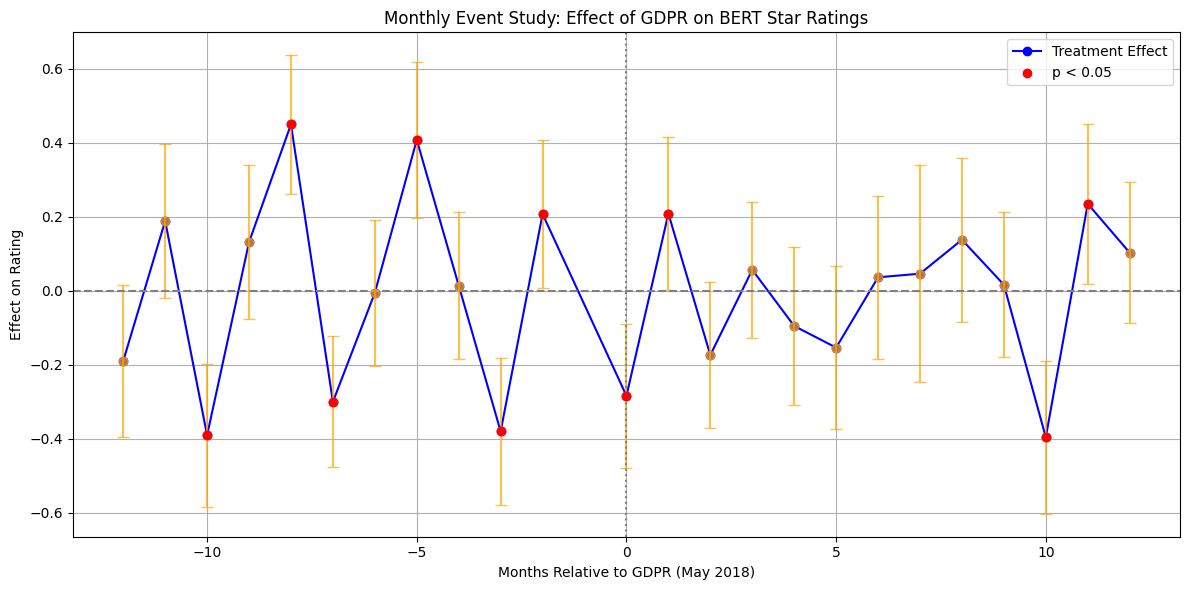

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Extract coefficients and confidence intervals
coefs = monthly_event_model.params
conf = monthly_event_model.conf_int()
pvals = monthly_event_model.pvalues

event_data = []

for term in event_terms:
    if term in coefs:
        # Extract relative month (handle pre/post)
        if 'pre' in term:
            rel_month = -int(term.replace('m', '').replace('pre_treated', ''))
        else:
            rel_month = int(term.replace('m', '').replace('post_treated', ''))

        coef = coefs[term]
        lower, upper = conf.loc[term]
        pval = pvals[term]

        event_data.append((rel_month, coef, lower, upper, pval))

# Convert to DataFrame
event_df = pd.DataFrame(event_data, columns=['month', 'coef', 'lower', 'upper', 'pval']).sort_values('month')

# Step 2: Plot
plt.figure(figsize=(12, 6))

# Plot treatment effect line
plt.plot(event_df['month'], event_df['coef'], label='Treatment Effect', color='blue', marker='o')

# Plot confidence intervals
plt.errorbar(event_df['month'], event_df['coef'],
             yerr=[event_df['coef'] - event_df['lower'], event_df['upper'] - event_df['coef']],
             fmt='o', color='orange', alpha=0.7, capsize=4)

# Highlight statistically significant points (p < 0.05)
sig_mask = event_df['pval'] < 0.05
plt.scatter(event_df.loc[sig_mask, 'month'], event_df.loc[sig_mask, 'coef'],
            color='red', zorder=5, label='p < 0.05')

# Reference lines
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle=':')

# Labels and legend
plt.title('Monthly Event Study: Effect of GDPR on BERT Star Ratings')
plt.xlabel('Months Relative to GDPR (May 2018)')
plt.ylabel('Effect on Rating')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [9]:
import pandas as pd
import statsmodels.formula.api as smf

# Copy original dataframe
sample_df_rating_eventstudy = sample_df.copy()
sample_df_rating_eventstudy['date'] = pd.to_datetime(sample_df_rating_eventstudy['date'])

# Define GDPR policy date
gdpr_date = pd.Timestamp("2018-05-01")
sample_df_rating_eventstudy['gdpr_month'] = (
    (sample_df_rating_eventstudy['date'].dt.year - gdpr_date.year) * 12 +
    (sample_df_rating_eventstudy['date'].dt.month - gdpr_date.month)
)

# Define event months
rel_months_rating = list(range(-12, 13))
rel_months_rating.remove(-1)

event_terms_rating = []
for m in rel_months_rating:
    base = f"m{abs(m)}{'pre' if m < 0 else 'post'}"
    sample_df_rating_eventstudy[base] = (sample_df_rating_eventstudy['gdpr_month'] == m).astype(int)
    interaction = f"{base}_treated"
    sample_df_rating_eventstudy[interaction] = sample_df_rating_eventstudy[base] * sample_df_rating_eventstudy['under_gdpr']
    event_terms_rating.append(interaction)

# Add fixed effects
sample_df_rating_eventstudy['month'] = sample_df_rating_eventstudy['date'].dt.to_period('M').astype(str)
covariates_rating = ['C(month)', 'C(company_name)']

# Build formula
formula_rating = 'rating ~ ' + ' + '.join(event_terms_rating + covariates_rating)

# Run regression
rating_event_model = smf.ols(
    formula=formula_rating,
    data=sample_df_rating_eventstudy.dropna(subset=['rating'])
).fit()

print(rating_event_model.summary())


                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     4.393
Date:                Thu, 12 Jun 2025   Prob (F-statistic):               0.00
Time:                        19:21:10   Log-Likelihood:                -46321.
No. Observations:               30000   AIC:                         9.547e+04
Df Residuals:                   28586   BIC:                         1.072e+05
Df Model:                        1413                                         
Covariance Type:            nonrobust                                         
                                                                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

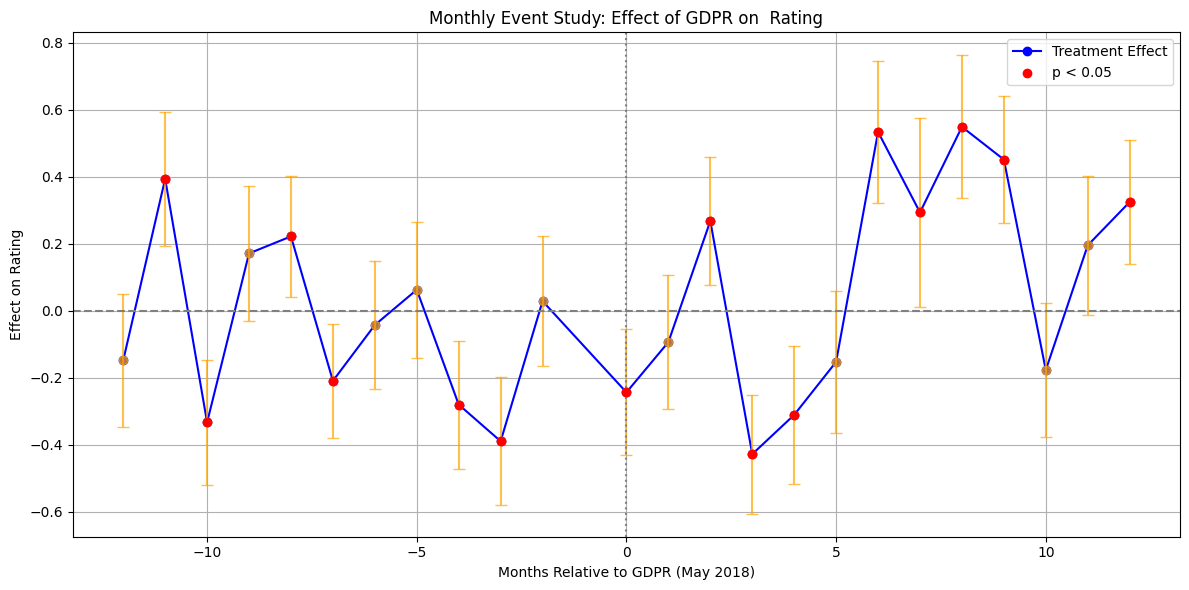

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Extract coefficients, CI, and p-values
coefs_rating = rating_event_model.params
conf_rating = rating_event_model.conf_int()
pvals_rating = rating_event_model.pvalues

event_data_rating = []
for term in event_terms_rating:
    if term in coefs_rating:
        if 'pre' in term:
            month = -int(term.replace('m', '').replace('pre_treated', ''))
        else:
            month = int(term.replace('m', '').replace('post_treated', ''))
        coef = coefs_rating[term]
        lower, upper = conf_rating.loc[term]
        pval = pvals_rating[term]
        event_data_rating.append((month, coef, lower, upper, pval))

event_df_rating = pd.DataFrame(event_data_rating, columns=['month', 'coef', 'lower', 'upper', 'pval']).sort_values('month')

# Plot
plt.figure(figsize=(12, 6))
plt.plot(event_df_rating['month'], event_df_rating['coef'], label='Treatment Effect', color='blue', marker='o')
plt.errorbar(event_df_rating['month'], event_df_rating['coef'],
             yerr=[event_df_rating['coef'] - event_df_rating['lower'], event_df_rating['upper'] - event_df_rating['coef']],
             fmt='o', color='orange', alpha=0.7, capsize=4)

sig_mask = event_df_rating['pval'] < 0.05
plt.scatter(event_df_rating.loc[sig_mask, 'month'], event_df_rating.loc[sig_mask, 'coef'],
            color='red', zorder=5, label='p < 0.05')

plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle=':')
plt.title('Monthly Event Study: Effect of GDPR on  Rating')
plt.xlabel('Months Relative to GDPR (May 2018)')
plt.ylabel('Effect on Rating')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [10]:
import pandas as pd
import statsmodels.formula.api as smf

# Copy original dataframe
sample_df_vader_eventstudy = sample_df.copy()
sample_df_vader_eventstudy['date'] = pd.to_datetime(sample_df_vader_eventstudy['date'])

# Define GDPR policy date
gdpr_date = pd.Timestamp("2018-05-01")
sample_df_vader_eventstudy['gdpr_month'] = (
    (sample_df_vader_eventstudy['date'].dt.year - gdpr_date.year) * 12 +
    (sample_df_vader_eventstudy['date'].dt.month - gdpr_date.month)
)

# Define event months
rel_months_vader = list(range(-12, 13))
rel_months_vader.remove(-1)

event_terms_vader = []
for m in rel_months_vader:
    base = f"m{abs(m)}{'pre' if m < 0 else 'post'}"
    sample_df_vader_eventstudy[base] = (sample_df_vader_eventstudy['gdpr_month'] == m).astype(int)
    interaction = f"{base}_treated"
    sample_df_vader_eventstudy[interaction] = sample_df_vader_eventstudy[base] * sample_df_vader_eventstudy['under_gdpr']
    event_terms_vader.append(interaction)

# Add fixed effects
sample_df_vader_eventstudy['month'] = sample_df_vader_eventstudy['date'].dt.to_period('M').astype(str)
covariates_vader = ['C(month)', 'C(company_name)']

# Build formula
formula_vader = 'vader_sentiment ~ ' + ' + '.join(event_terms_vader + covariates_vader)

# Run regression
vader_event_model = smf.ols(
    formula=formula_vader,
    data=sample_df_vader_eventstudy.dropna(subset=['vader_sentiment'])
).fit()

print(vader_event_model.summary())


                            OLS Regression Results                            
Dep. Variable:        vader_sentiment   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     3.350
Date:                Thu, 12 Jun 2025   Prob (F-statistic):          8.73e-316
Time:                        19:22:20   Log-Likelihood:                -20852.
No. Observations:               30000   AIC:                         4.453e+04
Df Residuals:                   28586   BIC:                         5.628e+04
Df Model:                        1413                                         
Covariance Type:            nonrobust                                         
                                                                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

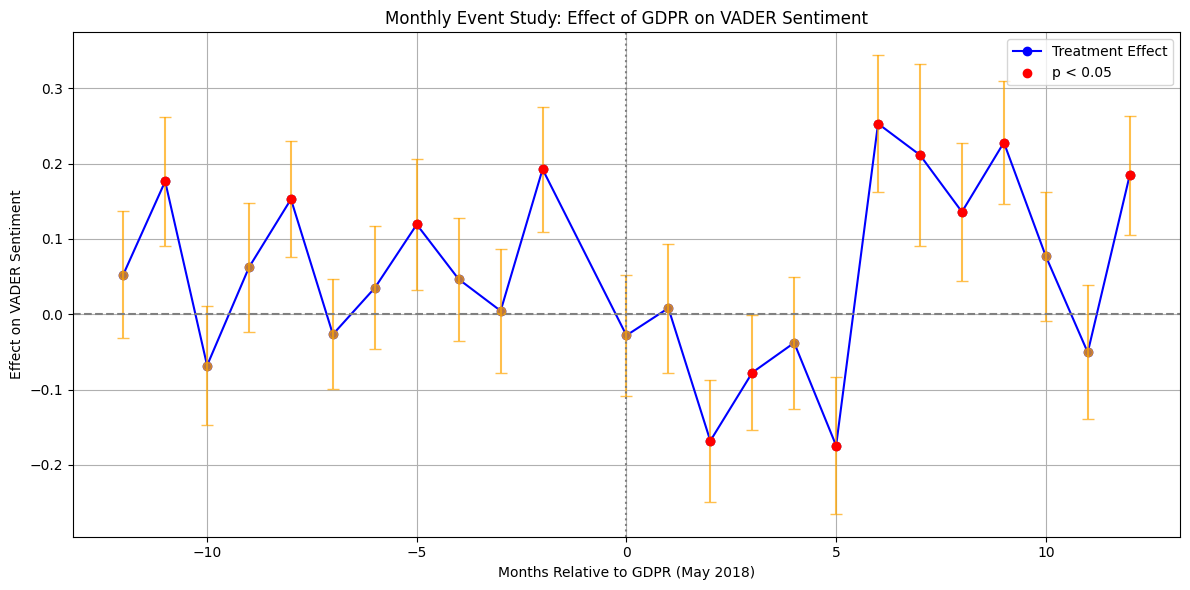

In [12]:
# Extract coefficients, CI, and p-values
coefs_vader = vader_event_model.params
conf_vader = vader_event_model.conf_int()
pvals_vader = vader_event_model.pvalues

event_data_vader = []
for term in event_terms_vader:
    if term in coefs_vader:
        if 'pre' in term:
            month = -int(term.replace('m', '').replace('pre_treated', ''))
        else:
            month = int(term.replace('m', '').replace('post_treated', ''))
        coef = coefs_vader[term]
        lower, upper = conf_vader.loc[term]
        pval = pvals_vader[term]
        event_data_vader.append((month, coef, lower, upper, pval))

event_df_vader = pd.DataFrame(event_data_vader, columns=['month', 'coef', 'lower', 'upper', 'pval']).sort_values('month')

# Plot
plt.figure(figsize=(12, 6))
plt.plot(event_df_vader['month'], event_df_vader['coef'], label='Treatment Effect', color='blue', marker='o')
plt.errorbar(event_df_vader['month'], event_df_vader['coef'],
             yerr=[event_df_vader['coef'] - event_df_vader['lower'], event_df_vader['upper'] - event_df_vader['coef']],
             fmt='o', color='orange', alpha=0.7, capsize=4)

sig_mask = event_df_vader['pval'] < 0.05
plt.scatter(event_df_vader.loc[sig_mask, 'month'], event_df_vader.loc[sig_mask, 'coef'],
            color='red', zorder=5, label='p < 0.05')

plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle=':')
plt.title('Monthly Event Study: Effect of GDPR on VADER Sentiment')
plt.xlabel('Months Relative to GDPR (May 2018)')
plt.ylabel('Effect on VADER Sentiment')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## DID with controls and fixed effects

In [115]:
import statsmodels.formula.api as smf

# Make sure post_gdpr and under_gdpr are numeric
sample_df['under_gdpr'] = sample_df['under_gdpr'].astype(int)
sample_df['post_gdpr'] = sample_df['post_gdpr'].astype(int)
sample_df['did'] = sample_df['under_gdpr'] * sample_df['post_gdpr']

# Define controls
covariates = [
    'company_size_Mid_Size',
    'company_size_Small',
    'seniority_level_Mid_Level',
    'seniority_level_Senior',
    'CEO_Approval_Sentiment',
    'Business_Outlook_Sentiment',
    'Recommmend_sentiment',
   # 'C(company_name)',  # Firm FE
    'C(year)',          # Year FE
]

# Define formula
formula = 'bert_star_rating ~ post_gdpr + under_gdpr + did + ' + ' + '.join(covariates)

# Fit model
did_model = smf.ols(formula=formula, data=sample_df.dropna(subset=['bert_star_rating'])).fit()
print(did_model.summary())


                            OLS Regression Results                            
Dep. Variable:       bert_star_rating   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     197.5
Date:                Tue, 27 May 2025   Prob (F-statistic):               0.00
Time:                        16:35:18   Log-Likelihood:                -7385.5
No. Observations:                5000   AIC:                         1.480e+04
Df Residuals:                    4987   BIC:                         1.488e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [126]:
matched_df.sample(10)

,company_name,date,rating,status,job,CEO_Approval_Sentiment,Business_Outlook_Sentiment,Recommmend_sentiment,eu_status,founded_year,under_gdpr,industry,month,treated,company_size_Mid_Size,company_size_Small,seniority_level_Mid_Level,seniority_level_Senior,propensity_score,vader_sentiment,year,gdpr_year,post_gdpr,did,clean_full_review
1141382,KPMG,2019-12-18,4.0,Current Employee,Anonymous Employee,0.0,0.0,0.0,Non-EU,1987,1,Consulting & Business Services,2019-12,1,False,False,False,True,0.618211,0.8834,2019,1,1,1,management consultant good brand recognition g...
667740,Cisco Systems,2016-12-07,4.0,Current Employee,,0.5,1.0,1.0,Non-EU,1984,1,IT & Software,2016-12,1,False,False,False,True,0.618039,0.8176,2016,-2,0,0,good company varieties of technologies to expl...
2078922,VF,2017-02-20,5.0,"Current Employee, more than 1 year",Human Resources Benefits Representative,1.0,1.0,1.0,Non-EU,1899,0,Retail,2017-02,0,False,False,False,False,0.613160,0.9805,2017,-1,0,0,great company great benefits great compensatio...
1411077,Life Care Centers of America,2018-09-18,5.0,"Current Employee, more than 1 year",Executive Director,1.0,1.0,1.0,Non-EU,1970,0,Healthcare,2018-09,0,False,False,False,False,0.617237,0.9870,2018,0,1,0,executive director life care is a great financ...
1124364,Barclays,2017-01-30,3.0,Current Employee,Anonymous Employee,0.5,-1.0,-1.0,EU,1690,1,Financial Services,2017-01,1,False,False,False,True,0.601069,0.5829,2017,-1,0,0,investment banking the people are easy to work...
367460,McDonald s,2018-04-11,3.0,Former Employee,,0.0,0.0,0.0,Non-EU,1940,1,Food & Beverage,2018-04,1,False,False,False,True,0.615516,0.4404,2018,0,0,0,cashier good team work was able to move into a...
2269117,CHRISTUS Health,2020-05-15,5.0,"Current Employee, more than 10 years",Leader,1.0,1.0,1.0,Non-EU,1999,0,Healthcare,2020-05,0,False,False,False,True,0.618898,0.3182,2020,2,1,0,strong leadership in unprecedented times cultu...
579069,Trane Technologies,2020-04-30,5.0,Former Employee,Forklift Operator,1.0,1.0,1.0,Non-EU,1913,1,Construction & Engineering,2020-04,1,False,False,False,True,0.613965,0.8481,2020,2,1,1,good great people good job fun crappy pay smal...
1572481,CALVIN KLEIN,2018-01-05,4.0,Former Employee,Anonymous Employee,1.0,0.0,1.0,Non-EU,1968,0,Retail,2018-01,0,False,False,False,True,0.617122,0.8126,2018,0,0,0,good environment discounts on the product and ...
892297,Argos,2019-04-05,3.0,Current Employee,Part,0.0,0.0,0.0,EU,1972,1,Retail,2019-04,1,False,False,False,True,0.617352,0.7730,2019,1,1,1,reasonable staff discount in argos and sainsbu...


In [127]:
matched_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639670 entries, 0 to 2639669
Data columns (total 25 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   company_name                object        
 1   date                        datetime64[ns]
 2   rating                      float64       
 3   status                      object        
 4   job                         object        
 5   CEO_Approval_Sentiment      float64       
 6   Business_Outlook_Sentiment  float64       
 7   Recommmend_sentiment        float64       
 8   eu_status                   object        
 9   founded_year                int64         
 10  under_gdpr                  int32         
 11  industry                    object        
 12  month                       object        
 13  treated                     int64         
 14  company_size_Mid_Size       bool          
 15  company_size_Small          bool          
 16  seniority_level_Mi

In [128]:
binary_cols = matched_df.select_dtypes('bool').columns
matched_df[binary_cols] = matched_df[binary_cols].astype(int)


In [129]:
summary_df = matched_df.describe().T  # Transpose for better readability
summary_df = summary_df[['mean', 'std', 'min', 'max']]
summary_df = summary_df.round(2)


In [130]:
with open("summary_statistics_table.tex", "w") as f:
    f.write(summary_df.to_latex(caption="Summary Statistics of Matched Sample", label="tab:summary_stats"))


In [131]:
binary_cols = sample_df.select_dtypes('bool').columns
sample_df[binary_cols] = sample_df[binary_cols].astype(int)
summary2_df = sample_df.describe().T  # Transpose for better readability
summary2_df = summary2_df[['mean', 'std', 'min', 'max']]
summary2_df = summary2_df.round(2)
summary2_df

,mean,std,min,max
date,2018-04-10 20:42:25.919999744,NaN,2016-05-25 00:00:00,2020-05-25 00:00:00
rating,3.4486,1.268101,1.0,5.0
CEO_Approval_Sentiment,0.38,0.630142,-1.0,1.0
Business_Outlook_Sentiment,0.321,0.70403,-1.0,1.0
Recommmend_sentiment,0.243,0.855627,-1.0,1.0
founded_year,1943.2376,57.661773,1096.0,2018.0
under_gdpr,0.5006,0.50005,0.0,1.0
treated,0.5006,0.50005,0.0,1.0
company_size_Mid_Size,0.0,0.0,0.0,0.0
company_size_Small,0.0,0.0,0.0,0.0


In [133]:
sample_df.sample(10)

,company_name,date,rating,status,job,CEO_Approval_Sentiment,Business_Outlook_Sentiment,Recommmend_sentiment,eu_status,founded_year,under_gdpr,industry,month,treated,company_size_Mid_Size,company_size_Small,seniority_level_Mid_Level,seniority_level_Senior,propensity_score,vader_sentiment,year,gdpr_year,post_gdpr,did,bert_star_rating,clean_review,truncated_review,bert_star_cat,year_quarter
1612120,Vons,2019-05-16,3.0,"Former Employee, more than 5 years",HOME SHOPPING DEPARTMENT MANAGER,-1.0,-1.0,-1.0,Non-EU,1906,0,Food & Beverage,2019-05,0,0,0,0,1,0.613563,-0.5879,2019,1,1,0,5,post employment review union very affordable h...,post employment review union very affordable h...,positive,2019Q2
666519,Cisco Systems,2018-06-13,4.0,"Current Employee, more than 10 years",Anonymous Employee,1.0,1.0,1.0,Non-EU,1984,1,IT & Software,2018-06,1,0,0,0,1,0.618039,0.9773,2018,0,1,1,4,a pretty decent company to work for a very ope...,a pretty decent company to work for a very ope...,positive,2018Q2
153221,EY,2017-01-16,5.0,"Current Employee, more than 1 year","Account Support Associate, Assurance",0.5,1.0,1.0,Non-EU,1989,1,Consulting & Business Services,2017-01,1,0,0,0,0,0.618325,0.9663,2017,-1,0,0,5,excellent company i cannot praise this company...,excellent company i cannot praise this company...,positive,2017Q1
2032748,ZIM Integrated Shipping Services,2017-06-14,3.0,"Current Employee, more than 5 years",Accounts Receivable,0.5,0.5,1.0,Non-EU,1945,0,Logistics & Transport,2017-06,0,0,0,0,1,0.615803,0.7351,2017,-1,0,0,3,employee the working people are friendly do yo...,employee the working people are friendly do yo...,neutral,2017Q2
1403107,Aveanna Healthcare,2020-01-19,4.0,"Current Employee, more than 1 year",Physical Therapist,0.0,0.0,0.0,Non-EU,2017,0,Healthcare,2020-01,0,0,0,0,0,0.619927,0.5423,2020,2,1,0,4,good company to start with great management in...,good company to start with great management in...,positive,2020Q1
836083,Reckitt,2019-07-04,2.0,"Former Employee, more than 5 years",Senior Marketing Manager,-1.0,-1.0,-1.0,EU,1823,1,Other,2019-07,1,0,0,0,1,0.608779,0.5719,2019,1,1,1,1,broken culture good pay some great colleagues ...,broken culture good pay some great colleagues ...,negative,2019Q3
708260,Wipro,2018-10-02,4.0,"Current Employee, more than 3 years",Senior Software Engineer,1.0,1.0,1.0,Non-EU,1945,1,IT & Software,2018-10,1,0,0,1,0,0.615803,0.7003,2018,0,1,1,4,good platform provides good training in variou...,good platform provides good training in variou...,positive,2018Q4
437489,Cognizant Technology Solutions,2018-02-15,4.0,"Former Employee, more than 5 years",Anonymous Employee,0.0,0.0,0.0,Non-EU,1994,1,IT & Software,2018-02,1,0,0,0,1,0.618611,0.6705,2018,0,0,0,5,associateprojects nice benefits and career gro...,associateprojects nice benefits and career gro...,positive,2018Q1
509567,Rio Tinto,2016-07-14,5.0,Current Employee,Process Coordinator,0.0,1.0,1.0,Non-EU,1873,1,Other,2016-07,1,0,0,0,1,0.611663,0.7096,2016,-2,0,0,5,process coordinator work culture great here do...,process coordinator work culture great here do...,positive,2016Q3
1585157,WestRock,2017-07-06,3.0,Former Employee,Anonymous Employee,1.0,1.0,-1.0,Non-EU,2015,0,Other,2017-07,0,0,0,0,1,0.619812,-0.3783,2017,-1,0,0,3,senior purchasing analyst allowed to apply and...,senior purchasing analyst allowed to apply and...,neutral,2017Q3


In [134]:
sample_df.to_csv('sample_bert_sentiment.csv', index=False)


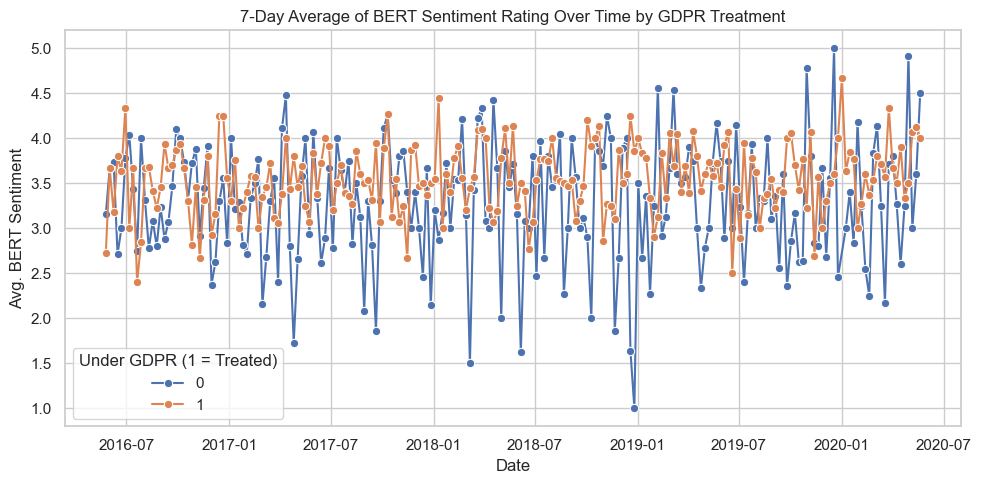

C:\Users\Ethan D\AppData\Local\Temp\ipykernel_13532\702151029.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  resampled = sample_df.groupby('under_gdpr').resample(freq)['bert_star_rating'].mean().reset_index()


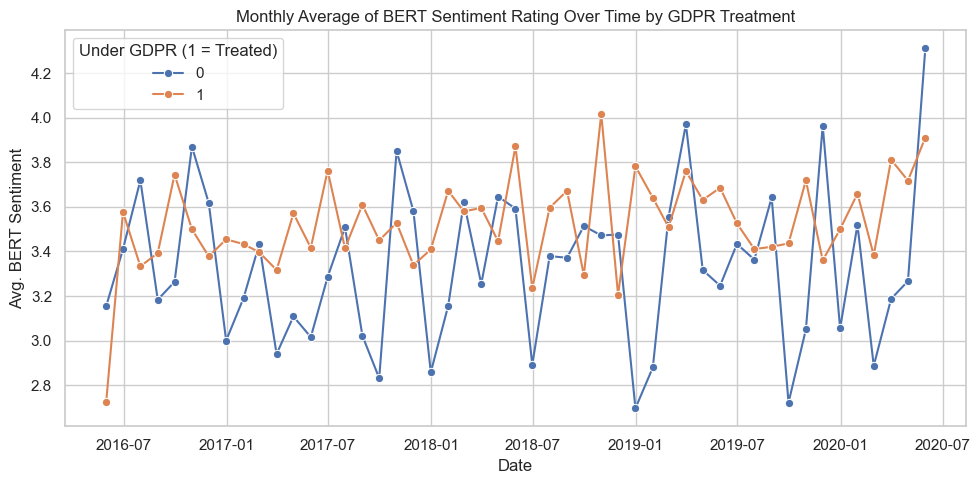

C:\Users\Ethan D\AppData\Local\Temp\ipykernel_13532\702151029.py:18: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  resampled = sample_df.groupby('under_gdpr').resample(freq)['bert_star_rating'].mean().reset_index()


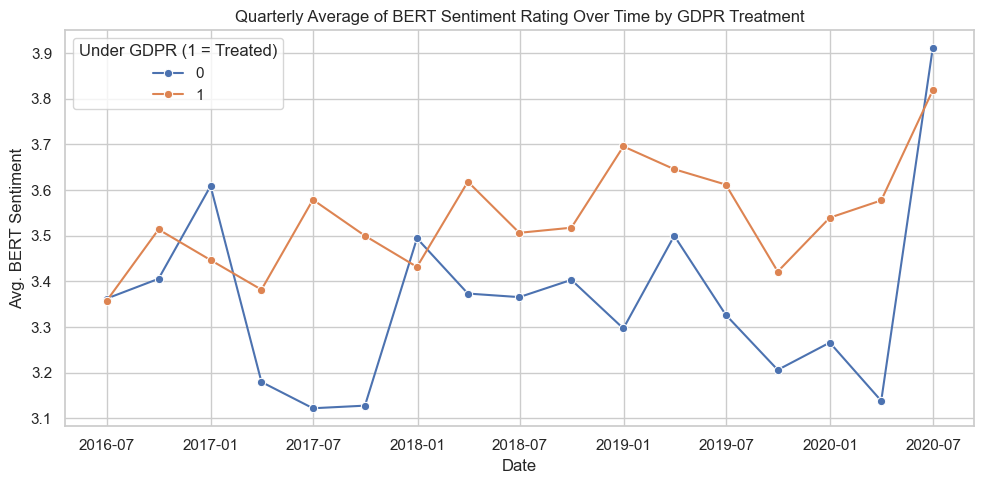

C:\Users\Ethan D\AppData\Local\Temp\ipykernel_13532\702151029.py:18: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  resampled = sample_df.groupby('under_gdpr').resample(freq)['bert_star_rating'].mean().reset_index()


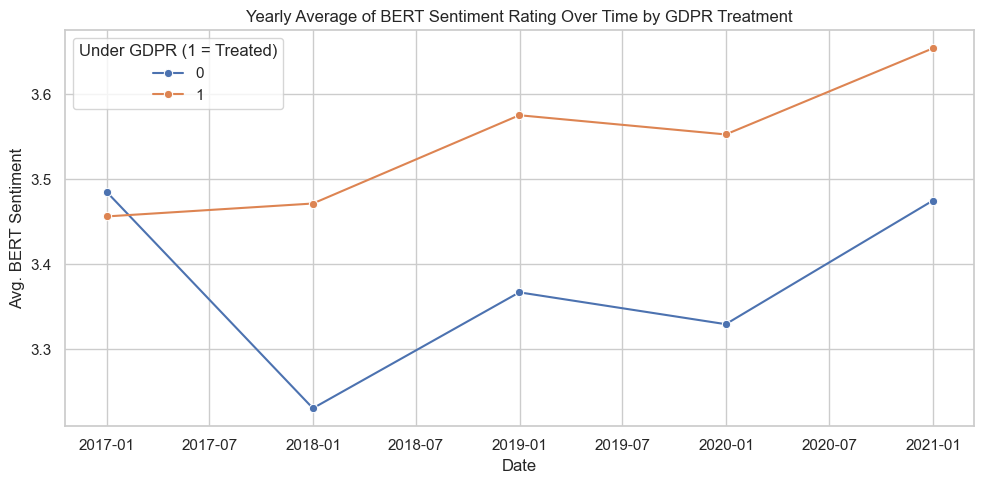

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



# Resampling configurations
resample_configs = {
    '7D': '7-Day Average',
    'M': 'Monthly Average',
    'Q': 'Quarterly Average',
    'Y': 'Yearly Average'
}

# Loop through each time resolution
for freq, label in resample_configs.items():
    # Resample by date and under_gdpr
    resampled = sample_df.groupby('under_gdpr').resample(freq)['bert_star_rating'].mean().reset_index()
    
    # Plot
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=resampled, x='date', y='bert_star_rating', hue='under_gdpr', marker='o')
    plt.title(f"{label} of BERT Sentiment Rating Over Time by GDPR Treatment")
    plt.xlabel("Date")
    plt.ylabel("Avg. BERT Sentiment")
    plt.legend(title="Under GDPR (1 = Treated)")
    plt.tight_layout()
    plt.show()


In [7]:
unique_companies = sample_df['company_name'].nunique()
print(f"Number of unique companies: {unique_companies}")


Number of unique companies: 1342


In [16]:
import pandas as pd
import statsmodels.formula.api as smf

# Step 1: Prepare data
sample_df['date'] = pd.to_datetime(sample_df['date'])
sample_df['post_gdpr'] = (sample_df['date'].dt.year >= 2018).astype(int)
sample_df['post_treated'] = sample_df['post_gdpr'] * sample_df['under_gdpr']

# Step 2: Define covariates and fixed effects
covariates = [
    'seniority_level_Mid_Level',
    'seniority_level_Senior',
    'CEO_Approval_Sentiment',
    'Business_Outlook_Sentiment',
    'Recommmend_sentiment',
    'C(year)',        # Time fixed effects
    'C(company_name)'      # Firm fixed effects (adapt to your actual firm column)
]

# Step 3: Build formula for DiD with fixed effects
did_formula = 'rating ~ post_treated + ' + ' + '.join(covariates)

# Step 4: Fit the model
did_model = smf.ols(formula=did_formula, data=sample_df.dropna(subset=['rating'])).fit()

# Step 5: Print summary
print(did_model.summary())


                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     27.33
Date:                Sat, 07 Jun 2025   Prob (F-statistic):               0.00
Time:                        21:23:23   Log-Likelihood:                -36849.
No. Observations:               30000   AIC:                         7.640e+04
Df Residuals:                   28648   BIC:                         8.764e+04
Df Model:                        1351                                         
Covariance Type:            nonrobust                                         
                                                                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [17]:
import pandas as pd
import statsmodels.formula.api as smf

# Step 1: Prepare data
sample_df['date'] = pd.to_datetime(sample_df['date'])
sample_df['post_gdpr'] = (sample_df['date'].dt.year >= 2018).astype(int)
sample_df['post_treated'] = sample_df['post_gdpr'] * sample_df['under_gdpr']

# Step 2: Define covariates and fixed effects
covariates = [
    'seniority_level_Mid_Level',
    'seniority_level_Senior',
    'CEO_Approval_Sentiment',
    'Business_Outlook_Sentiment',
    'Recommmend_sentiment',
    'C(year)',        # Time fixed effects
    'C(company_name)'      # Firm fixed effects (adapt to your actual firm column)
]

# Step 3: Build formula for DiD with fixed effects
did_formula_2 = 'vader_sentiment ~ post_treated + ' + ' + '.join(covariates)

# Step 4: Fit the model
did_model_2 = smf.ols(formula=did_formula_2, data=sample_df.dropna(subset=['vader_sentiment'])).fit()

# Step 5: Print summary
print(did_model_2.summary())


                            OLS Regression Results                            
Dep. Variable:        vader_sentiment   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     8.215
Date:                Sat, 07 Jun 2025   Prob (F-statistic):               0.00
Time:                        21:24:01   Log-Likelihood:                -18239.
No. Observations:               30000   AIC:                         3.918e+04
Df Residuals:                   28648   BIC:                         5.042e+04
Df Model:                        1351                                         
Covariance Type:            nonrobust                                         
                                                                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [3]:
import pandas as pd
import statsmodels.formula.api as smf

sample_df = pd.read_csv("sample_30k.csv", encoding = 'latin1')

In [4]:
sample_df.columns

Index(['company_name', 'date', 'rating', 'status', 'job',
       'CEO_Approval_Sentiment', 'Business_Outlook_Sentiment',
       'Recommmend_sentiment', 'eu_status', 'founded_year', 'under_gdpr',
       'industry', 'month', 'treated', 'company_size_Mid_Size',
       'company_size_Small', 'seniority_level_Mid_Level',
       'seniority_level_Senior', 'propensity_score', 'vader_sentiment', 'year',
       'gdpr_year', 'post_gdpr', 'did', 'clean_review', 'truncated_review',
       'bert_star_rating', 'bert_star_cat', 'year_m2', 'year_m2_treated',
       'year_0', 'year_0_treated', 'year_1', 'year_1_treated', 'year_2',
       'year_2_treated'],
      dtype='object')

In [5]:
# Step 1: Prepare data
sample_df['date'] = pd.to_datetime(sample_df['date'])
sample_df['post_gdpr'] = (sample_df['date'].dt.year >= 2018).astype(int)
sample_df['post_treated'] = sample_df['post_gdpr'] * sample_df['under_gdpr']

# Step 2: Define covariates and fixed effects
covariates = [
    'seniority_level_Mid_Level',
    'seniority_level_Senior',
    'CEO_Approval_Sentiment',
    'Business_Outlook_Sentiment',
    'Recommmend_sentiment',
    'C(year)',        # Time fixed effects
    'C(company_name)'      # Firm fixed effects (adapt to your actual firm column)
]

# Step 3: Build formula for DiD with fixed effects
did_formula_3 = 'bert_star_rating ~ post_treated + ' + ' + '.join(covariates)

# Step 4: Fit the model
did_model_3 = smf.ols(formula=did_formula_3, data=sample_df.dropna(subset=['bert_star_rating'])).fit()

# Step 5: Print summary
print(did_model_3.summary())


                            OLS Regression Results                            
Dep. Variable:       bert_star_rating   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     13.41
Date:                Tue, 10 Jun 2025   Prob (F-statistic):               0.00
Time:                        22:02:33   Log-Likelihood:                -42584.
No. Observations:               30000   AIC:                         8.787e+04
Df Residuals:                   28648   BIC:                         9.911e+04
Df Model:                        1351                                         
Covariance Type:            nonrobust                                         
                                                                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------